In [14]:
%pip install torch matplotlib numpy scipy seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 15.8 MB/s  0:00:00eta 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [seaborn]m3/4 [seaborn]
Note: you may need to restart the kernel to use updated packages.


# 22.8. Distributions

## 1. Introduction

### Problem Statement

In Computer Science, we rarely operate in a perfect, predictable world. Real-world data is noisy, hardware components have inherent failure rates, and user behavior fluctuates randomly. To build robust systems, whether it is a neural network recognizing images or a distributed database ensuring consistency, we cannot simply guess. We need probability distributions.

Probability distributions provide the essential framework to quantify uncertainty. They allow us to model variables ranging from discrete binary choices (like a "yes/no" click) to continuous signals (like audio frequencies or pixel intensities). By understanding the underlying distribution of our data, we can calculate risks, optimize performance, and train algorithms to make accurate predictions even in the presence of noise.

### Applications in Computer Science

This document bridges the gap between statistical theory and code, exploring how fundamental distributions are applied to solve core computing challenges:
  
- **Binary Classification (Spam Filter):** We utilize the Bernoulli distribution as the foundation for modeling binary outcomes. This is the core mechanism behind binary classifiers, such as spam detection algorithms that categorize emails as either "Spam" (1) or "Not Spam" (0).

- **Load Balancing & System Stability:** We apply Uniform distributions to algorithms requiring fairness and unpredictability.

- **Discrete Uniform:** Used in Load Balancing to randomly select servers, ensuring traffic is spread evenly across resources.

- **Continuous Uniform:** Used to introduce Jitter (Random Delays) in distributed systems, preventing "Thundering Herd" problems where simultaneous service restarts crash the database.

- **Hardware Reliability (RAID 6):** We employ the Binomial distribution to assess system risks. By modeling independent hard drive failures, we can calculate the probability of data loss in storage arrays (like RAID 6), informing critical decisions on data insurance and redundancy.
  
- **Cybersecurity (DDoS Detection):** We use the Poisson distribution to model the rate of arrival events. This is critical for **Anomaly Detection**, where the system identifies Brute-force or DDoS attacks by flagging traffic spikes that statistically deviate from the normal Poisson baseline.

- **Sensor Noise Modeling (Robotics):** We examine the Gaussian (Normal) distribution, the standard model for measurement uncertainty. In Robotics and IoT, it is essential for filtering signal noise (e.g., LiDAR distance readings) to estimate true states despite imperfect sensors.

From the discrete simplicity of a Bernoulli trial to the continuous complexity of the Gaussian bell curve, and the rare-event modeling of the Poisson, this guide provides the mathematical definitions, step-by-step proofs, and practical Python implementations for each. Let us dive into the probability theories that power intelligent computing.

## 2.1. Bernoulli Distribution

### Definition 

The Bernoulli distribution models a random experiment that has only two possible outcomes: **Success** (denoted as 1) or **Failure** (denoted as 0).

A classic example is tossing a coin: heads is 1, tails is 0.

If a random variable $X$ follows this distribution with success probability $p$ (where $0 \le p \le 1$), we denote:

$$X \sim \text{Bernoulli}(p)$$

**Probability Mass Function (PMF):**

The probability that $X$ takes the value $x$ is:

$$P(X=x) = \begin{cases} p & \text{if } x = 1 \\ 1-p & \text{if } x = 0 \end{cases} \tag{22.8.1}$$



**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases}
0 & x < 0 \\
1-p & 0 \le x < 1 \\
1 & x \ge 1
\end{cases}\tag{22.8.2}$$

**Expectation:**

$$\mu_X = p$$

**Variance:**

$$\sigma_X^2 = p(1-p)$$
    

### Graph

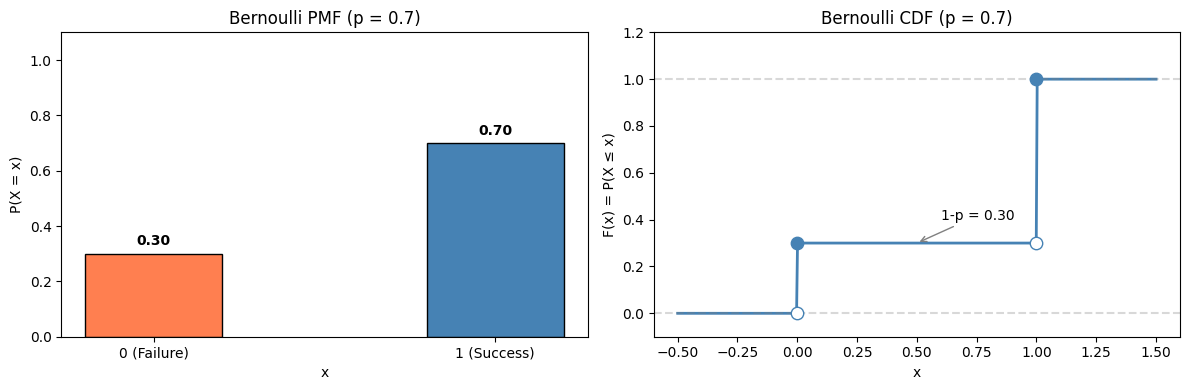

Bernoulli Distribution with p = 0.7
  PMF: P(X=0) = 0.30, P(X=1) = 0.70
  Mean (μ) = p = 0.70
  Variance (σ²) = p(1-p) = 0.2100


In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Bernoulli parameter
p = 0.7  # Success probability

# --- PMF Plot ---
x_pmf = [0, 1]
pmf_values = [1 - p, p]  # P(X=0) = 1-p, P(X=1) = p

# --- CDF Plot ---
# CDF is a step function: 0 for x<0, (1-p) for 0<=x<1, 1 for x>=1
x_cdf = np.linspace(-0.5, 1.5, 500)
cdf_values = np.where(x_cdf < 0, 0, np.where(x_cdf < 1, 1 - p, 1))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# PMF plot (bar chart)
axes[0].bar(x_pmf, pmf_values, color=['coral', 'steelblue'], edgecolor='black', width=0.4)
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(X = x)')
axes[0].set_title(f'Bernoulli PMF (p = {p})')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['0 (Failure)', '1 (Success)'])
axes[0].set_ylim(0, 1.1)
# Add value labels on bars
for i, v in enumerate(pmf_values):
    axes[0].text(x_pmf[i], v + 0.03, f'{v:.2f}', ha='center', fontweight='bold')

# CDF plot (step function)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark the jump points
axes[1].scatter([0, 1], [1 - p, 1], color='steelblue', s=80, zorder=5)  # Closed points
axes[1].scatter([0, 1], [0, 1 - p], facecolors='white', edgecolors='steelblue', s=80, zorder=5)  # Open points
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Bernoulli CDF (p = {p})')
axes[1].set_ylim(-0.1, 1.2)
# Add annotations
axes[1].annotate(f'1-p = {1-p:.2f}', xy=(0.5, 1-p), xytext=(0.6, 1-p+0.1),
                 arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10)

plt.tight_layout()
plt.show()

print(f"Bernoulli Distribution with p = {p}")
print(f"  PMF: P(X=0) = {1-p:.2f}, P(X=1) = {p:.2f}")
print(f"  Mean (μ) = p = {p:.2f}")
print(f"  Variance (σ²) = p(1-p) = {p*(1-p):.4f}")


### Step-by-step Computation 

**Probability Mass Function (PMF)**

_Original Definition:_

The Bernoulli random variable $X$ has only two outcomes:

- $X=1$ (Success) with probability $p$.
    
- $X=0$ (Failure) with probability $1-p$.
    

So it can be seen that the p.m.f formula is correct.

**Cumulative Distribution Function (CDF)**

_Original Definition:_

The cumulative distribution function is the probability that the random variable $X$ takes a value less than or equal to a certain level $x$:

$$F(x) = P(X \le x)$$

_Formula to be proved:_

$$F(x) = \begin{cases} 0 & x < 0 \\ 1-p & 0 \le x < 1 \\ 1 & x \ge 1 \end{cases}$$

_Consider each interval:_

- $x < 0$
    
    Random variable $X$ only takes values 0 or 1. There is no value of $X$ smaller than a negative number (e.g., $x = -0.5$). Therefore, the event $\{X \le x\}$ is an impossible event. Thus: $F(x) = P(\emptyset) = 0$
    
- $0 \le x < 1$ (Example: $x = 0.5$)
    
    Among the possible values of $X$ ($0$ and $1$), only the value $0$ satisfies the condition of being less than or equal to $x$ (e.g., $\le 0.5$). Thus $P(X \le x) = P(X=0)$.
    
    According to the PMF section above, $P(X=0) = 1-p$. Thus: $F(x) = 1-p$
    
- $x \ge 1$ (Example: $x = 1.5$)
    
    The values of $X$ are $0$ and $1$, which satisfy $\le 1.5$. Thus $P(X \le x) = P(X=0) + P(X=1)$.
    
    Thus: $F(x) = (1-p) + p = 1$
    

**Expectation ($\mu_X$):**

According to the definition of expectation for discrete variables:

$$\begin{aligned} \mathbb{E}[X] &= \sum x \cdot P(X=x) \\ &= 1 \cdot P(X=1) + 0 \cdot P(X=0) \\ &= 1 \cdot p + 0 \cdot (1-p) \quad \text{(by p.m.f definition)} \\ &= p \end{aligned}$$

**Variance ($\sigma_X^2$):**

According to the definition of expectation: $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$.

We have the second moment:

$$\begin{aligned} \mathbb{E}[X^2] &= \sum x^2 \cdot P(X=x) \\ &= 1^2 \cdot P(X=1) + 0^2 \cdot P(X=0) \\ &= 1 \cdot p + 0 \cdot (1-p) \\ &= p \end{aligned}$$

Therefore: $\text{Var}(X) = p - p^2 = p(1 - p)$


### Concrete Example

In Computer Science, the Bernoulli distribution is the mathematical foundation for **Binary Classification**. Consider an email filtering system where a specific incoming email is modeled as a random variable $X$:

- $X = 1$: The email is **Spam** (Success).
    
- $X = 0$: The email is **Not Spam** (Failure).
    
- $p$: The probability that the email is Spam, predicted by an AI model (e.g., Logistic Regression).
    

#### Step-by-Step Computation

Let us calculate the statistics for a specific email where the AI model predicts a probability of **$p = 0.95$**.

The probability distribution of $X$ is defined as:

$$P(X=x) = \begin{cases} p & \text{if } x = 1 \\ 1-p & \text{if } x = 0 \end{cases} \tag{22.8.1}$$

Applying $p = 0.95$:

- The probability that this specific email is Spam ($x=1$) is:
    
    $$P(X=1) = 0.95$$
    
- The probability that this specific email is Not Spam ($x=0$) is:
    
    $$P(X=0) = 1 - 0.95 = 0.05$$
    
We can manually verify the theoretical properties for this email:

- **Expectation:** $\mathbb{E}[X] = p = \mathbf{0.95}$.
    
- Variance:
    
    $$\text{Var}(X) = p(1-p) = 0.95 \times (1 - 0.95) = 0.95 \times 0.05 = \mathbf{0.0475}$$
    
    (The low variance implies the model is very confident in this prediction).
    

To assign a final class label $\hat{y}$, we compare $p$ against a standard threshold $\tau = 0.5$:

$$\hat{y} = \begin{cases} 1 & \text{if } p > 0.5 \\ 0 & \text{otherwise} \end{cases}$$

Since $0.95 > 0.5$, the system classifies this email as **Spam (1)**.

#### Python Implementation

In [1]:
import torch

# 1. Setup Data
# Suppose we have 5 incoming emails.
# 'predicted_probs' represents the parameter 'p' for 5 independent Bernoulli variables.
# (Email 1 is very likely spam, Email 2 is safe, etc.)
predicted_probs = torch.tensor([0.95, 0.10, 0.80, 0.05, 0.60])

print("Predicted probabilities (p):", predicted_probs)

# 2. Define Threshold
# This is the decision boundary for our classification
threshold = 0.5

# 3. Decision (Classification)
# If p > 0.5 then 1 (Spam), otherwise 0 (Not Spam)
# We cast boolean results to float (0.0 or 1.0)
predictions = (predicted_probs > threshold).float()

print("Classification labels (y_hat):", predictions)

# 4. Interpret Results
print("\n--- Detailed Results ---")
for i, pred in enumerate(predictions):
    label = "SPAM" if pred == 1 else "NOT SPAM"
    p_val = predicted_probs[i].item()
    
    # Calculate Variance: p(1-p)
    variance = p_val * (1 - p_val)
    
    print(f"Email {i+1}: {label:<8} | p = {p_val:.2f} | Var = {variance:.4f}")

Predicted probabilities (p): tensor([0.9500, 0.1000, 0.8000, 0.0500, 0.6000])
Classification labels (y_hat): tensor([1., 0., 1., 0., 1.])

--- Detailed Results ---
Email 1: SPAM     | p = 0.95 | Var = 0.0475
Email 2: NOT SPAM | p = 0.10 | Var = 0.0900
Email 3: SPAM     | p = 0.80 | Var = 0.1600
Email 4: NOT SPAM | p = 0.05 | Var = 0.0475
Email 5: SPAM     | p = 0.60 | Var = 0.2400


## 2.2. Discrete Uniform Distribution

### Definition

This distribution is used to describe the case where we randomly select an integer from the set $\{1, 2, ..., n\}$ where every value is equally likely to occur (e.g., rolling a 6-sided die, so $n=6$).

**Notation:** $$X \sim U(n) \tag{22.8.3}$$.

**Probability Mass Function (PMF):**

Since there are $n$ values and equal probability, the probability of each value is $\frac{1}{n}$.

$$p_i = P(X=i) = \frac{1}{n} \quad \text{for } i \in \{1, 2, ..., n\}$$


**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases}
0 & x < 1 \\
\frac{\lfloor x \rfloor}{n} & 1 \le x < n \\
1 & x \ge n
\end{cases}$$

$\lfloor x \rfloor$ is the floor value of x

In D2L book, the CDF is defined as:

$$F(x)= \begin{cases} 0 & x < 1, \\ \frac{k}{n} & k \leq x < k+1 \text{ with } 1 \leq k < n, \\ 1 & x \geq n. \end{cases}\tag{22.8.4}$$

The derivation uses $k$ as a placeholder for the integer part of $x$. We replace $k$ with the floor function $\lfloor x \rfloor$ for two main reasons.

First, it is mathematically equivalent: the condition $k \le x < k+1$ is effectively the definition of the floor function, meaning $k$ and $\lfloor x \rfloor$ are identical. Second, it offers computational optimization. Using $\lfloor x \rfloor$ creates a closed-form solution that removes the extra variable $k$. This makes the formula easier to read and directly compatible with code functions like Python's `math.floor`.

**Expectation:**

$$\mu_X = \frac{n+1}{2}$$

**Variance:**

$$\sigma_X^2 = \frac{n^2-1}{12}$$


### Graph


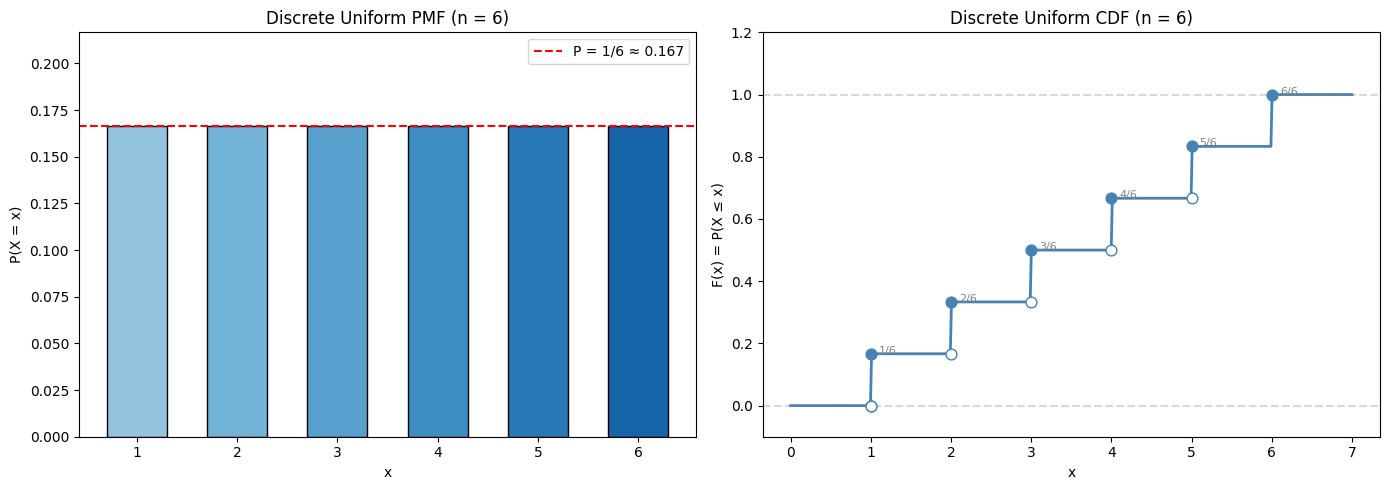

Discrete Uniform Distribution U(6)
  PMF: P(X=i) = 1/6 = 0.1667 for i ∈ {1, 2, ..., 6}
  Mean (μ) = (n+1)/2 = 3.50
  Variance (σ²) = (n²-1)/12 = 2.9167


In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Discrete Uniform parameter
n = 6  # Number of outcomes (like a 6-sided die)

# --- PMF Plot ---
x_pmf = list(range(1, n + 1))  # {1, 2, ..., n}
pmf_values = [1 / n] * n  # Each value has probability 1/n

# --- CDF Plot ---
# CDF is a step function: 0 for x<1, floor(x)/n for 1<=x<n, 1 for x>=n
x_cdf = np.linspace(0, n + 1, 500)
cdf_values = np.where(x_cdf < 1, 0, np.where(x_cdf < n, np.floor(x_cdf) / n, 1))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF plot (bar chart)
colors = plt.cm.Blues(np.linspace(0.4, 0.8, n))
axes[0].bar(x_pmf, pmf_values, color=colors, edgecolor='black', width=0.6)
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(X = x)')
axes[0].set_title(f'Discrete Uniform PMF (n = {n})')
axes[0].set_xticks(x_pmf)
axes[0].set_ylim(0, max(pmf_values) * 1.3)
# Add horizontal line showing equal probability
axes[0].axhline(y=1/n, color='red', linestyle='--', linewidth=1.5, label=f'P = 1/{n} ≈ {1/n:.3f}')
axes[0].legend()

# CDF plot (step function)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark the jump points (closed circles at each integer)
for i in range(1, n + 1):
    axes[1].scatter([i], [i / n], color='steelblue', s=60, zorder=5)  # Closed points
    if i < n:
        axes[1].scatter([i], [(i - 1) / n], facecolors='white', edgecolors='steelblue', s=60, zorder=5)  # Open points
# Open point at x=1 for F(x)=0
axes[1].scatter([1], [0], facecolors='white', edgecolors='steelblue', s=60, zorder=5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Discrete Uniform CDF (n = {n})')
axes[1].set_ylim(-0.1, 1.2)
axes[1].set_xticks(range(0, n + 2))
# Add step annotations
for i in range(1, n + 1):
    axes[1].annotate(f'{i}/{n}', xy=(i + 0.1, i / n), fontsize=8, color='gray')

plt.tight_layout()
plt.show()

# Print statistics
mean = (n + 1) / 2
variance = (n**2 - 1) / 12
print(f"Discrete Uniform Distribution U({n})")
print(f"  PMF: P(X=i) = 1/{n} = {1/n:.4f} for i ∈ {{1, 2, ..., {n}}}")
print(f"  Mean (μ) = (n+1)/2 = {mean:.2f}")
print(f"  Variance (σ²) = (n²-1)/12 = {variance:.4f}")


### Step-by-step Computation 

**Cumulative Distribution Function (PDF):**

Suppose we have a random variable $X$ following a discrete uniform distribution on the set of integers $\{1, 2, \dots, n\}$.

The probability mass function (PMF): $P(X=k) = \frac{1}{n}$ for all $k \in \{1, \dots, n\}$.

According to the CDF definition:

$$F(x) = \begin{cases}
   0 & x < 1 \\
   \frac{\lfloor x \rfloor}{n} & 1 \le x < n \\
   1 & x \ge n
\end{cases}$$

We consider 3 cases of $x$ on the real number line:

Case 1: $x < 1$

Random variable $X$ only takes values from $1$ onwards.

Therefore, there is no value of $X$ satisfying smaller than $x$ (when $x < 1$).

The event $\{X \le x\}$ is an empty set.

$$F(x) = 0$$

Case 2: $1 \le x < n$

This is the most interesting part using the floor function.

We need to calculate the sum of probabilities of all integer values $k$ such that $1 \le k \le x$.

Since $k$ must be an integer, the condition $k \le x$ is equivalent to $k \le \lfloor x \rfloor$ (the largest integer not exceeding $x$).

Thus the valid values of $X$ are: $\{1, 2, \dots, \lfloor x \rfloor\}$.

The quantity of these values is exactly $\lfloor x \rfloor$.

Since each value has a probability equal to $\frac{1}{n}$, we have:

$$F(x) = \underbrace{\frac{1}{n} + \frac{1}{n} + \dots + \frac{1}{n}}_{\lfloor x \rfloor \text{ times}} = \lfloor x \rfloor \cdot \frac{1}{n} = \frac{\lfloor x \rfloor}{n}$$

Case 3: $x \ge n$

When $x \ge n$, the cumulative interval $(-\infty, x]$ has covered the entire set of possible values $\{1, 2, \dots, n\}$ of the random variable.

The total probability of the entire sample space is always 1.

$$F(x) = 1$$

**Expectation ($\mu_X$):**

We have:

$$\mathbb{E}[X] = \sum_{x_i=1}^n x_i \cdot P(X=x_i)$$

Substituting $P(X=i) = \frac{1}{n}$, we get:

$$\mathbb{E}[X] = \sum_{x_i=1}^n x_i \cdot \frac{1}{n} = \frac{1}{n} \sum_{x_i=1}^n x_i$$

Applying the sum of natural numbers formula: $1+2+...+n = \frac{n(n+1)}{2}$, we have:

$$\mathbb{E}[X] = \frac{1}{n} \cdot \frac{n(n+1)}{2} = \frac{n+1}{2}$$

**Variance ($\sigma_X^2$):**

According to the definition of variance: $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$.

We have the second moment ($\mathbb{E}[X^2]$):

$$\begin{aligned} \mathbb{E}[X^2] &= \sum_{x_i=1}^n x_i^2 \cdot P(X=x_i) \\[8pt] &= \sum_{x_i=1}^n x_i^2 \cdot \frac{1}{n} \\[8pt] &= \frac{1}{n} \sum_{x_i=1}^n x_i^2 \end{aligned}$$

Applying the sum of squares formula: $1^2 + ... + n^2 = \frac{n(n+1)(2n+1)}{6}$, we have:

$$\mathbb{E}[X^2] = \frac{1}{n} \cdot \frac{n(n+1)(2n+1)}{6} = \frac{(n+1)(2n+1)}{6}$$

Therefore:

$$\begin{aligned} \text{Var}(X) &= \frac{(n+1)(2n+1)}{6} - \left( \frac{n+1}{2} \right)^2 \\[8pt] &= \frac{(n+1)(2n+1)}{6} - \frac{(n+1)^2}{4} \\[8pt] &= \frac{2(n+1)(2n+1)}{12} - \frac{3(n+1)^2}{12} \\[8pt] &= \frac{n+1}{12} \left[ 2(2n+1) - 3(n+1) \right] \\[8pt] &= \frac{n+1}{12} \left[ 4n + 2 - 3n - 3 \right] \\[8pt] &= \frac{n+1}{12} [n - 1] \\[8pt] &= \frac{n^2 - 1}{12} \end{aligned}$$


### Concrete Example

In distributed systems, the Discrete Uniform distribution is the mathematical model behind **Random Load Balancing**. Suppose you have a cluster of $n$ servers to serve incoming user requests. When a new request arrives, the load balancer must decide which server to route it to.

The most effective "stateless" strategy is **Random Selection**:

- We model the decision as a random variable $X$, representing the index of the selected server.
    
- The pool of servers is $\{1, 2, ..., n\}$.
    
- The probability of choosing any specific server is equal: $p = \frac{1}{n}$.
    

**Benefits:** This approach is extremely fast, requires no memory of previous requests, and according to the Law of Large Numbers, the load will be distributed evenly across all machines as the number of requests increases.

#### Step-by-Step Computation

Let us consider a specific cluster with **$n = 5$** servers. We define the random variable $X \sim U(1, 5)$.

The probability of routing a request to any specific server $k$ (e.g., Server 3) is:

$$P(X=k) = \frac{1}{n} \quad \text{for } k \in \{1, 2, 3, 4, 5\}$$

Substituting $n=5$:

$$P(X=3) = \frac{1}{5} = \mathbf{0.2}$$

(Every server has a 20% chance of receiving the request).

We can calculate the theoretical properties of this distribution:

- Expectation (Mean):
    
    The expected server index (center of the distribution):
    
    $$\mathbb{E}[X] = \frac{a + b}{2} = \frac{1 + 5}{2} = \mathbf{3}$$
    
- Variance:
    
    The spread of the selection logic:
    
    $$\text{Var}(X) = \frac{(b - a + 1)^2 - 1}{12} = \frac{(5 - 1 + 1)^2 - 1}{12}$$
    
    $$\text{Var}(X) = \frac{5^2 - 1}{12} = \frac{24}{12} = \mathbf{2}$$
    

### Python Implementation 

We will simulate the situation:

- The system has **5 Servers**.
    
- Receives **1,000,000 Requests**.
    
- We will use `torch.randint` to route requests according to a uniform distribution and check if the load is truly balanced.

In [2]:
import torch

# 1. System Configuration
num_servers = 5
num_requests = 1000000  # 1 million requests

# 2. Load Balancer: Route requests
# We generate 1 million random integers.
# torch.randint generates integers in the range [low, high).
# To simulate U(1, 5), we use low=1 and high=6.
# (Note: In 0-indexed programming, this often maps to 0-4, but the math is identical).
server_indices = torch.randint(0, num_servers, size=(num_requests,))

# 3. Load statistics on each server
# torch.bincount counts the occurrences of each index
server_loads = torch.bincount(server_indices)

print(f"Total Requests: {num_requests}")
print("-" * 35)

for i in range(num_servers):
    load = server_loads[i].item()
    # Ideal theoretical probability is 1/5 = 20%
    percent = (load / num_requests) * 100
    print(f"Server {i+1}: {load} requests ({percent:.2f}%)")

print("-" * 35)

# 4. Evaluate deviation
# Ideal scenario: Each server receives exactly 200,000 requests.
max_load = server_loads.max().item()
min_load = server_loads.min().item()
diff = max_load - min_load

print(f"Difference (Max - Min): {diff} requests")
print(f"Percentage deviation:   {diff / num_requests * 100:.4f}%")

Total Requests: 1000000
-----------------------------------
Server 1: 199854 requests (19.99%)
Server 2: 199889 requests (19.99%)
Server 3: 199393 requests (19.94%)
Server 4: 201157 requests (20.12%)
Server 5: 199707 requests (19.97%)
-----------------------------------
Difference (Max - Min): 1764 requests
Percentage deviation:   0.1764%


## 2.3. Continuous Uniform Distribution

### Definition

The continuous uniform distribution is a distribution where probability is equally likely for all outcomes of a continuous random variable.

This distribution appears when we take the discrete uniform distribution (choosing 1 of $n$ numbers), increase $n$ to infinity, and stretch it to fit in an interval $[a, b]$. It represents choosing a random value arbitrarily in the interval $[a, b]$ with equal probability.

**Notation:** $$X \sim U(a, b)\tag{22.8.5}$$.

**Probability Density Function (PDF):**

Unlike the discrete case (PMF), for continuous variables we use "density". Since the probability of picking an exact specific point is 0, we only care about the probability falling into an _interval_.

To make the total area under the graph equal to 1 (total probability = 1), the height of the rectangle on the segment $[a, b]$ must be $\frac{1}{b-a}$.

$$p(x) = \begin{cases} \frac{1}{b-a} & \text{if } a \le x \le b \\ 0 & \text{if } x < a \text{ or } x > b \end{cases} \tag{22.8.6}$$

**Cumulative Distribution Function (CDF):**

This is the area calculated from the left to point $x$.

$$F(x) = \begin{cases} 0 & \text{for } x < a, \\ \frac{x-a}{b-a} & \text{for } a \le x \le b, \\ 1 & \text{for } x > b. \end{cases}$$


In D2l, the CDF function defined:

$$F(x) =
\begin{cases}
0, & x < a,\\[4pt]
\dfrac{x - a}{b - a}, & x \in [a,b],\\[4pt]
1, & x \ge b.
\end{cases}\tag{22.8.7}$$

This means at the point $x=b$, both conditions $x \in [a,b]$ and $x \ge b$ are satisfied. Although the calculated value is still consistent ($=1$), but in terms of function definition, the condition overlap is not optimal.


**Expectation:**

$$\mu_X = \frac{a+b}{2}$$

**Variance:**

$$\sigma_X^2 = \frac{(b-a)^2}{12}$$


### Graph


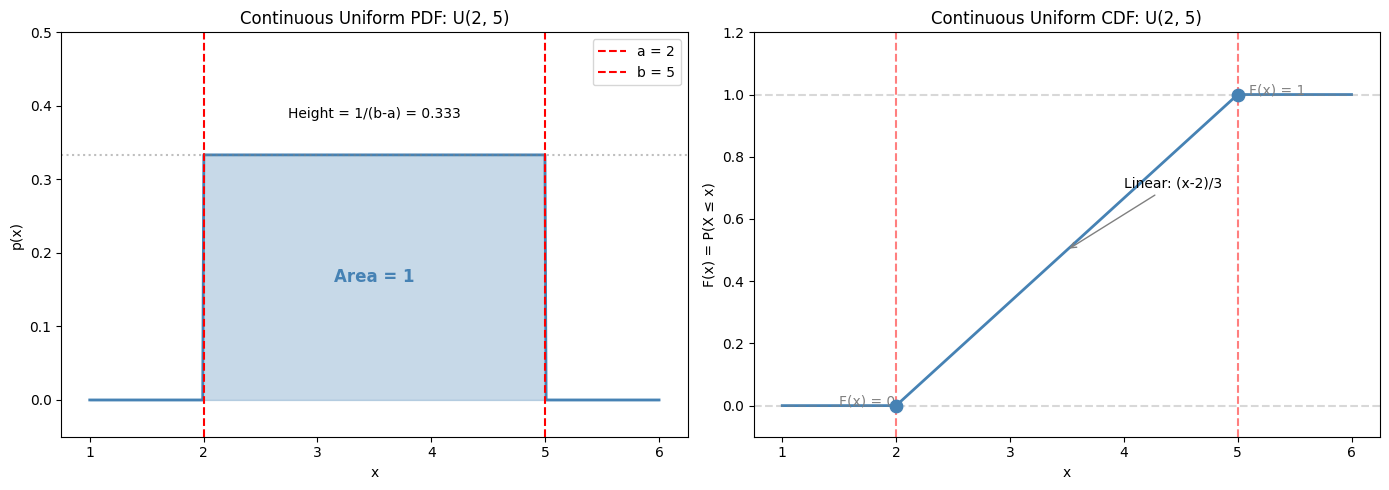

Continuous Uniform Distribution U(2, 5)
  PDF: p(x) = 1/(b-a) = 0.3333 for x ∈ [2, 5]
  Mean (μ) = (a+b)/2 = 3.50
  Variance (σ²) = (b-a)²/12 = 0.7500


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Continuous Uniform parameters
a, b = 2, 5  # Interval [a, b]

# --- PDF Plot ---
x_pdf = np.linspace(a - 1, b + 1, 500)
pdf_values = np.where((x_pdf >= a) & (x_pdf <= b), 1 / (b - a), 0)

# --- CDF Plot ---
x_cdf = np.linspace(a - 1, b + 1, 500)
cdf_values = np.where(x_cdf < a, 0, np.where(x_cdf <= b, (x_cdf - a) / (b - a), 1))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF plot (rectangle)
axes[0].plot(x_pdf, pdf_values, color='steelblue', linewidth=2)
axes[0].fill_between(x_pdf, pdf_values, alpha=0.3, color='steelblue')
# Mark the boundaries
axes[0].axvline(x=a, color='red', linestyle='--', linewidth=1.5, label=f'a = {a}')
axes[0].axvline(x=b, color='red', linestyle='--', linewidth=1.5, label=f'b = {b}')
axes[0].axhline(y=1/(b-a), color='gray', linestyle=':', alpha=0.5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('p(x)')
axes[0].set_title(f'Continuous Uniform PDF: U({a}, {b})')
axes[0].set_ylim(-0.05, 1/(b-a) * 1.5)
axes[0].legend()
# Add annotation for height
axes[0].annotate(f'Height = 1/(b-a) = {1/(b-a):.3f}', 
                 xy=((a+b)/2, 1/(b-a)), xytext=((a+b)/2, 1/(b-a) + 0.05),
                 ha='center', fontsize=10)
# Add annotation for area
axes[0].text((a+b)/2, 1/(b-a)/2, 'Area = 1', ha='center', va='center', 
             fontsize=12, fontweight='bold', color='steelblue')

# CDF plot (linear ramp)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark key points
axes[1].scatter([a, b], [0, 1], color='steelblue', s=80, zorder=5)
axes[1].axvline(x=a, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1].axvline(x=b, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Continuous Uniform CDF: U({a}, {b})')
axes[1].set_ylim(-0.1, 1.2)
# Add annotations
axes[1].annotate('F(x) = 0', xy=(a-0.5, 0), fontsize=10, color='gray')
axes[1].annotate('F(x) = 1', xy=(b+0.1, 1), fontsize=10, color='gray')
axes[1].annotate(f'Linear: (x-{a})/{b-a}', xy=((a+b)/2, 0.5), xytext=((a+b)/2 + 0.5, 0.7),
                 arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics
mean = (a + b) / 2
variance = (b - a)**2 / 12
print(f"Continuous Uniform Distribution U({a}, {b})")
print(f"  PDF: p(x) = 1/(b-a) = {1/(b-a):.4f} for x ∈ [{a}, {b}]")
print(f"  Mean (μ) = (a+b)/2 = {mean:.2f}")
print(f"  Variance (σ²) = (b-a)²/12 = {variance:.4f}")


### Step-by-step Computation

**Probability Density Function**

The total probability of the entire sample space must be **1**. For a continuous variable, this means the area under the PDF curve must equal 1.

$$\int_{-\infty}^{+\infty} p(x) \, dx = 1$$

Since $p(x) = 0$ when $x$ is outside $[a, b]$, we only need to integrate within the interval $[a, b]$:

$$\begin{aligned} & \int_{a}^{b} k \, dx = 1 \\ \Leftrightarrow \quad & k \cdot \int_{a}^{b} 1 \, dx = 1 \\ \Leftrightarrow \quad & k \cdot [x]_{a}^{b} = 1 \\ \Leftrightarrow \quad & k \cdot (b - a) = 1 \\ \Leftrightarrow \quad & k = \frac{1}{b-a} \end{aligned}$$

Thus we have the formula: $p(x) = \frac{1}{b-a}$ in the interval $[a, b]$.

**Cumulative Distribution Function (CDF)**

_Assumption:_

The probability density function (PDF) of the continuous uniform distribution $U(a, b)$ is:

$$p(t) = \begin{cases} \frac{1}{b-a} & a \le t \le b \\ 0 & \text{otherwise} \end{cases}$$

_CDF Definition:_

The cumulative distribution function is the probability that the random variable $X$ takes a value less than or equal to $x$, calculated by the integral of the density function:

$$F(x) = P(X \le x) = \int_{-\infty}^{x} p(t) \, dt$$

_Formula to be proved:_

$$F(x) = \begin{cases} 0 & x < a \\ \frac{x-a}{b-a} & a \le x \le b \\ 1 & x > b \end{cases}$$

_Consider each interval:_

- $x < a$ (Left of the domain)
    
    When $x$ is completely to the left of the interval $[a, b]$, the density function $p(t)$ is always 0 on the segment $(-\infty, x]$. Thus: $F(x) = \int_{-\infty}^{x} 0 \, dt = 0$
    
- $a \le x \le b$ (Possible value range)
    
    We split the integration domain into 2 parts: the part with no probability $(-\infty, a)$ and the part with uniform density $(a, x)$. $F(x) = \int_{-\infty}^{a} 0 \, dt + \int_{a}^{x} \frac{1}{b-a} \, dt$. Applying the antiderivative $\int C \, dt = Ct$:
    
    $$F(x) = 0 + \left[ \frac{t}{b-a} \right]_{t=a}^{t=x}= \frac{x}{b-a} - \frac{a}{b-a} = \frac{x-a}{b-a} $$
    
- $x > b$ (Right of the domain)
    
    We split the integration domain into 3 parts covering the entire possible value range $[a, b]$.
    
$$F(x) = \int_{-\infty}^{a} 0 \, dt + \int_{a}^{b} \frac{1}{b-a} \, dt + \int_{b}^{x} 0 \, dt = \left[ \frac{t}{b-a} \right]_{a}^{b} = \frac{b}{b-a} - \frac{a}{b-a} = \frac{b-a}{b-a} = 1$$    

**Expectation ($\mu_X$):**

According to the definition of expectation for continuous variables: $\mathbb{E}[X] = \int_{-\infty}^{+\infty} x \cdot p(x) dx$.

Since $p(x)$ is non-zero only in the interval $[a, b]$:

$$\begin{aligned} \mathbb{E}[X] &= \int_{a}^{b} x \cdot \frac{1}{b-a} \, dx \\[8pt] &= \frac{1}{b-a} \int_{a}^{b} x \, dx \\[8pt] &= \frac{1}{b-a} \left[ \frac{x^2}{2} \right]_{a}^{b} \quad \text{(Antiderivative of $x$ is $\frac{x^2}{2}$)} \\[8pt] &= \frac{1}{b-a} \left( \frac{b^2}{2} - \frac{a^2}{2} \right) \\[8pt] &= \frac{1}{b-a} \cdot \frac{(b-a)(b+a)}{2} \\[8pt] &= \frac{a+b}{2} \end{aligned}$$

**Variance ($\sigma_X^2$):**

According to the definition of variance: $\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$.

We have the Second Moment ($\mathbb{E}[X^2]$):

$$\begin{aligned} \mathbb{E}[X^2] &= \int_{-\infty}^{+\infty} x^2 \cdot p(x) \, dx \\[8pt] &= \int_{a}^{b} x^2 \cdot \frac{1}{b-a} \, dx \\[8pt] &= \frac{1}{b-a} \left[ \frac{x^3}{3} \right]_{a}^{b} \quad \text{(Antiderivative of $x^2$ is $\frac{x^3}{3}$)} \\[8pt] &= \frac{1}{b-a} \cdot \frac{b^3 - a^3}{3} \\[8pt] &= \frac{1}{b-a} \cdot \frac{(b-a)(b^2 + ab + a^2)}{3} \\[8pt] &= \frac{a^2 + ab + b^2}{3} \end{aligned}$$

Substituting into the variance formula:

$$\begin{aligned} \text{Var}(X) &= \frac{a^2 + ab + b^2}{3} - \left( \frac{a+b}{2} \right)^2 \\[8pt] &= \frac{4(a^2 + ab + b^2)}{12} - \frac{3(a^2 + 2ab + b^2)}{12} \\[8pt] &= \frac{4a^2 + 4ab + 4b^2 - 3a^2 - 6ab - 3b^2}{12} \\[8pt] &= \frac{a^2 - 2ab + b^2}{12} \\[8pt] &= \frac{(b-a)^2}{12} \end{aligned}$$


### Concrete Example

In distributed systems and cloud computing, a classic application is Preventing the "Thundering Herd" Problem via Jitter.

**Scenario:** Imagine you have 1,000 background worker services scheduled to restart exactly at midnight (00:00). If they all restart at the exact same millisecond, they will flood the database with login requests simultaneously, crashing the system.

Solution: Add a random "Jitter" (Delay).

We force each service to wait for a random amount of time $X$ before connecting. This time is chosen from a Continuous Uniform Distribution between 0 and 10 seconds.

- $X \sim U(0, 10)$.
    
- Since time is continuous (it can be 1.234s, 5.999s, etc.), this is a continuous distribution.
    

#### Step-by-Step Computation

Let us analyze the random delay variable $X$ with bounds $a = 0$ and $b = 10$.


For a continuous uniform distribution, the density is constant over the interval:

$$f(x) = \frac{1}{b - a} = \frac{1}{10 - 0} = \mathbf{0.1}$$


_(Note: For continuous variables, $P(X=k) = 0$. We talk about density or ranges)._

What is the probability that a service waits less than 7 seconds ($X \le 7$)?

$$P(X \le 7) = F(7) = \frac{x - a}{b - a} = \frac{7 - 0}{10 - 0} = \mathbf{0.7}$$

(There is a 70% chance the service starts within the first 7 seconds).

- Mean (Average Delay):
    
    $$\mathbb{E}[X] = \frac{a + b}{2} = \frac{0 + 10}{2} = \mathbf{5} \text{ seconds}$$
    
- Variance (Spread):
    
    $$\text{Var}(X) = \frac{(b - a)^2}{12} = \frac{(10 - 0)^2}{12} = \frac{100}{12} \approx \mathbf{8.33}$$
    


### Python Implementation

We will simulate 1,000 services generating their random start times to see if the traffic is spread out evenly.

Service #1 Delay: 1.6843 seconds


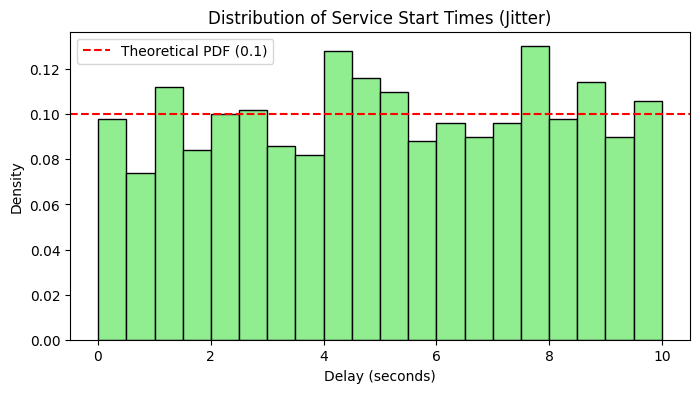

Theoretical P(X <= 7): 0.7000
Empirical P(X <= 7):   0.6840


In [3]:
import torch
import matplotlib.pyplot as plt

# 1. System Configuration
num_services = 1000
min_delay = 0.0  # a
max_delay = 10.0 # b

# 2. Generate Jitter (Random Delays)
# torch.rand generates continuous values in [0, 1]
# We scale it to [a, b]:  a + (b-a) * rand
random_delays = min_delay + (max_delay - min_delay) * torch.rand(num_services)

# 3. Analyze a specific service (e.g., Service #1)
sample_delay = random_delays[0].item()
print(f"Service #1 Delay: {sample_delay:.4f} seconds")

# 4. Visualize the Spread (Histogram)
# If Uniform, the bars should be roughly equal height (flat top)
plt.figure(figsize=(8, 4))
plt.hist(random_delays.numpy(), bins=20, color='lightgreen', edgecolor='black', density=True)
plt.axhline(y=1/(max_delay-min_delay), color='r', linestyle='--', label='Theoretical PDF (0.1)')

plt.title("Distribution of Service Start Times (Jitter)")
plt.xlabel("Delay (seconds)")
plt.ylabel("Density")
plt.legend()
plt.show()

# 5. Check Probability X <= 7 (CDF)
# Count how many are <= 7
count_below_7 = (random_delays <= 7.0).sum().item()
empirical_prob = count_below_7 / num_services

print(f"Theoretical P(X <= 7): 0.7000")
print(f"Empirical P(X <= 7):   {empirical_prob:.4f}")

## 2.4. Binomial Distribution

### Definition

The binomial distribution is a discrete probability distribution with two parameters $n$ and $p$. It models the number of successes in $n$ independent Bernoulli trials, each with success probability $p$.

Imagine tossing a coin once (Bernoulli), but toss $n$ times consecutively and independently and counting how many times heads appear.

Let $X_i$ be the result of the $i$-th toss (1 if heads, 0 if tails), then $$X_i \sim \text{Bernoulli}(p)$$.

The Binomial random variable $X$ is the total number of successes:

$$X = \sum_{i=1}^n X_i\tag{22.8.8}$$

Notation: $X \sim \text{Binomial}(n, p)$.

**Probability Mass Function (PMF):**

The probability of having exactly $k$ successes in $n$ trials is:

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}\tag{22.8.9}$$

Where $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ is the number of ways to choose $k$ successes from $n$ trials.

**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases} 0 & \text{if } x < 0 \\ \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1-p)^{n-k} & \text{if } 0 \le x < n \\ 1 & \text{if } x \ge n \end{cases}$$

In D2L book, the CDF function defined:

$$F(x) =
\begin{cases}
0, & x < 0,\\[4pt]
\displaystyle \sum_{m \le k} \binom{n}{m} p^{m} (1-p)^{\,n-m}, & k \le x < k+1 \text{ with } 0 \le k < n,\\[4pt]
1, & x \ge n.
\end{cases}\tag{22.8.10}$$

In the revised formula, the upper bound is explicitly written as $\lfloor x \rfloor$. This clarifies the meaning: the CDF is the sum of probabilities of all integers from 0 to the integer part of $x$.

it helps the formula be more concise, shifting from a conditional description form to a computational formula form (computational formula), convenient for algorithm implementation.

**Expectation:**

$$\mu_X = np$$

**Variance:**

$$\sigma_X^2 = np(1-p)$$

### Graph


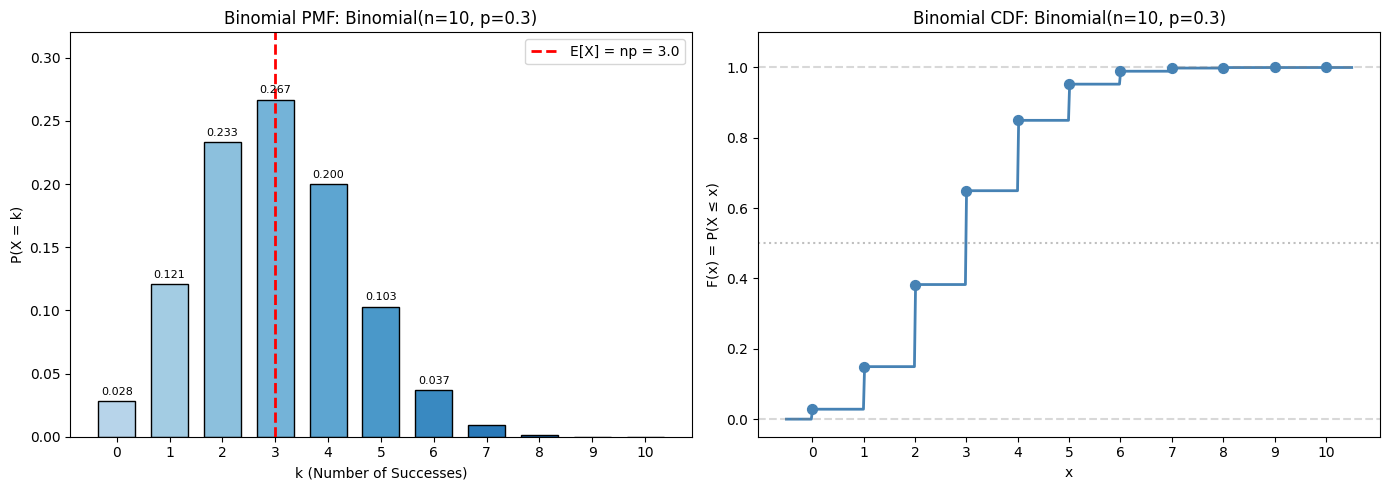

Binomial Distribution: Binomial(n=10, p=0.3)
  Mean (μ) = np = 3.00
  Variance (σ²) = np(1-p) = 2.1000
  Standard Deviation (σ) = 1.4491


In [6]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from math import comb

# Binomial parameters
n = 10  # Number of trials
p = 0.3  # Probability of success

# --- PMF Plot ---
k_values = list(range(0, n + 1))
pmf_values = [comb(n, k) * (p ** k) * ((1 - p) ** (n - k)) for k in k_values]

# --- CDF Plot ---
x_cdf = np.linspace(-0.5, n + 0.5, 500)
cdf_values = []
for x in x_cdf:
    if x < 0:
        cdf_values.append(0)
    elif x >= n:
        cdf_values.append(1)
    else:
        cdf_values.append(sum(pmf_values[:int(np.floor(x)) + 1]))
cdf_values = np.array(cdf_values)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF plot (bar chart)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(k_values)))
bars = axes[0].bar(k_values, pmf_values, color=colors, edgecolor='black', width=0.7)
axes[0].set_xlabel('k (Number of Successes)')
axes[0].set_ylabel('P(X = k)')
axes[0].set_title(f'Binomial PMF: Binomial(n={n}, p={p})')
axes[0].set_xticks(k_values)
axes[0].set_ylim(0, max(pmf_values) * 1.2)
# Mark the expected value
mean = n * p
axes[0].axvline(x=mean, color='red', linestyle='--', linewidth=2, label=f'E[X] = np = {mean:.1f}')
axes[0].legend()
# Add value labels on top bars
for i, (k, v) in enumerate(zip(k_values, pmf_values)):
    if v > 0.01:
        axes[0].text(k, v + 0.005, f'{v:.3f}', ha='center', fontsize=8)

# CDF plot (step function)
axes[1].plot(x_cdf, cdf_values, color='steelblue', linewidth=2)
# Mark the jump points
cdf_at_k = [sum(pmf_values[:k+1]) for k in k_values]
axes[1].scatter(k_values, cdf_at_k, color='steelblue', s=50, zorder=5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Binomial CDF: Binomial(n={n}, p={p})')
axes[1].set_ylim(-0.05, 1.1)
axes[1].set_xticks(k_values)

plt.tight_layout()
plt.show()

# Print statistics
variance = n * p * (1 - p)
print(f"Binomial Distribution: Binomial(n={n}, p={p})")
print(f"  Mean (μ) = np = {mean:.2f}")
print(f"  Variance (σ²) = np(1-p) = {variance:.4f}")
print(f"  Standard Deviation (σ) = {np.sqrt(variance):.4f}")


### Step-by-step Computation

**Probability Mass Function (PMF)**

Need to prove:

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

**Step 1: Probability of a specific scenario**

Suppose you toss a coin $n$ times. You want exactly $k$ heads (Success - $S$) and $n-k$ tails (Failure - $F$).

Imagine the simplest scenario: the first $k$ times are all heads, and all remaining $n-k$ times are tails.

The sequence of results will look like this:

$$\underbrace{S, S, \dots, S}_{k \text{ times}}, \underbrace{F, F, \dots, F}_{n-k \text{ times}}$$

Since the tosses are independent (the result of this one doesn't affect the other), we multiply the probabilities of each toss together:

- Probability of $S$ is $p$.
    
- Probability of $F$ is $(1-p)$.
    

So the probability of this specific sequence is:

$$P(\text{specific sequence}) = \underbrace{p \cdot p \dots p}_{k \text{ times}} \cdot \underbrace{(1-p) \cdot (1-p) \dots (1-p)}_{n-k \text{ times}} = p^k (1-p)^{n-k}$$

**Step 2: Counting the number of scenarios (Combinations)**

The problem is that the $k$ heads don't necessarily have to be at the beginning. They can be scrambled anywhere in the sequence of $n$ trials.

Example: $S, F, S, F \dots$ or $F, F, S, S \dots$

The question becomes: How many ways are there to arrange $k$ letters $S$ into $n$ empty positions?

This is the Combination problem in mathematics: Choose $k$ positions from $n$ positions (order of selection doesn't matter).

The number of ways to choose is:

$$\binom{n}{k} = C_n^k = \frac{n!}{k!(n-k)!}$$

**Step 3: Putting it together**

The overall probability $P(X=k)$ is the sum of probabilities of all possible scenarios.

Since these scenarios are mutually exclusive (you can't roll sequence A and sequence B at the same time), and each scenario has the same probability of $p^k (1-p)^{n-k}$ (calculated in Step 1), we perform multiplication:

$$\text{Total Probability} = (\text{Number of scenarios}) \times (\text{Probability of one scenario})$$

$$P(X=k) = \binom{n}{k} \cdot p^k (1-p)^{n-k}$$

**Cumulative Distribution Function (CDF)**

Starting from the original definition of CDF:

$$F(x) = P(X \le x)$$

The Binomial random variable $X$ only takes integer values belonging to the set $\{0, 1, 2, \dots, n\}$.

Formula to be proved:

$$F(x) = \begin{cases} 0 & \text{if } x < 0 \\ \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1-p)^{n-k} & \text{if } 0 \le x < n \\ 1 & \text{if } x \ge n \end{cases}$$

We consider 3 cases of $x$ on the real number line:

**Case 1: $x < 0$**

Random variable $X$ counts the number of successes, so $X$ cannot be negative ($X \ge 0$). Therefore, the event $\{X \le x\}$ with $x < 0$ is an impossible event.

$$F(x) = P(X \le x) = 0$$

**Case 2: $0 \le x < n$**

We need to calculate the sum of probabilities of all integer values $k$ that $X$ can take such that $k \le x$. Since $k$ must be an integer, the condition $k \le x$ is equivalent to $k \le \lfloor x \rfloor$ (the largest integer not exceeding $x$).

Example: If $x=2.7$, then the valid integer values are $0, 1, 2$. We see $\lfloor 2.7 \rfloor = 2$.

Thus $F(x)$ is the sum of probabilities $P(X=k)$ running from $k=0$ to the upper limit $\lfloor x \rfloor$:

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} P(X=k)$$

Substitute the Binomial PMF formula in:

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} \binom{n}{k} p^k (1-p)^{n-k}$$

**Expectation ($\mu_X$):**

We have the definition $X$ is the sum of $X_i$:

$$\mathbb{E}[X] = \mathbb{E}\left[ \sum_{i=1}^n X_i \right]$$

Applying the linearity property of expectation (Expectation of a sum equals the sum of expectations), we have:

$$\mathbb{E}[X] = \sum_{i=1}^n \mathbb{E}[X_i]$$

Since each $X_i \sim \text{Bernoulli}(p)$ then $\mathbb{E}[X_i] = p$ (as proved in the previous section). Substituting in, we get:

$$\mathbb{E}[X] = \sum_{i=1}^n p = n \cdot p$$

**Variance ($\sigma_X^2$):**

We have the definition $X$ is the sum of $X_i$:

$$\text{Var}(X) = \text{Var}\left( \sum_{i=1}^n X_i \right)$$

Assuming the variables $X_i$ are independent of each other, applying the property that the variance of a sum equals the sum of variances:

$$\text{Var}(X) = \sum_{i=1}^n \text{Var}(X_i)$$

Since each $X_i \sim \text{Bernoulli}(p)$ then $\text{Var}(X_i) = p(1-p)$. Substituting in, we have:

$$\text{Var}(X) = \sum_{i=1}^n p(1-p) = n \cdot p(1-p)$$


### Concrete Example

In System Engineering and Reliability Engineering, the Binomial distribution is crucial for assessing **System Reliability**.

**Scenario:** You are operating a Data Center using a **RAID 6** (Redundant Array of Independent Disks) storage system. This system consists of **$n = 8$ hard drives**.

- According to technical specifications, the probability of a single hard drive failing in one year is **$p = 5\%$ ($0.05$)**.
    
- The hard drives fail independently of each other.
    
- **Goal:** You want to calculate the risk probability to decide whether to purchase additional data insurance.
    

Question: What is the probability that exactly 2 hard drives fail simultaneously this year? ($k=2$).

(Note: RAID 6 remains operational if 2 drives fail, but this is the critical "Red Alert" threshold before data loss).

#### Step-by-Step Computation

We model the number of failed drives as a random variable $X \sim \text{Binomial}(n=8, p=0.05)$. We need to calculate the Probability Mass Function (PMF) at $k=2$.


The probability of exactly $k$ successes (failures in this context) in $n$ trials is:

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}  \\
&= \binom{8}{2} (0.05)^2 (0.95)^{6} \\
&= 28 \times 0.0025 \times 0.73509 \\
&= 0.05146$$



The number of ways to choose 2 failed drives out of 8 is:


$$\binom{8}{2} = \frac{8!}{2!(8-2)!} = \frac{8 \times 7}{2 \times 1} = \frac{56}{2} = \mathbf{28}$$

- **Probability of 2 failures:** $p^2 = 0.05^2 = 0.0025$
    
- **Probability of 6 survivals:** $(1-p)^{8-2} = 0.95^6 \approx 0.73509$
    
$$P(X=2) = 28 \times 0.0025 \times 0.73509$$

$$P(X=2) = 0.07 \times 0.73509 \approx \mathbf{0.05146}$$

**Conclusion:** There is approximately a **5.15%** chance that exactly 2 drives will fail this year.

In [23]:
import torch

# --- PART 1: THEORETICAL CALCULATION ---
# RAID problem configuration
n_drives = 8 # Total number of hard drives
p_fail = 0.05 # Failure probability of 1 drive (5%)

# Create Binomial distribution
# Note: PyTorch uses probs for p
binom_dist = torch.distributions.binomial.Binomial(total_count=n_drives, probs=p_fail)

# Calculate PMF at k=2 (Exactly 2 failed drives)
k_fail = 2
# log_prob returns logarithm of probability, so need exp() to get actual probability
prob_exact_2 = torch.exp(binom_dist.log_prob(torch.tensor(float(k_fail))))

print(f"1. Probability of having exactly {k_fail} failed hard drives (PMF): {prob_exact_2.item():.5f}")
# Result should be approximately 0.05146 as calculated by hand

# --- PART 2: REAL WORLD APPLICATION (CDF) ---
# RAID 6 is safe if number of failed drives <= 2. System CRASHES (Data Loss) if > 2 drives fail (i.e. 3, 4... 8).
# P(Crash) = P(X >= 3) = 1 - P(X <= 2) = 1 - CDF(2)

# Calculate CDF manually by accumulating PMF from 0 to 2
prob_safe = 0.0
for k in range(3): # k = 0, 1, 2
    prob_k = torch.exp(binom_dist.log_prob(torch.tensor(float(k))))
    prob_safe += prob_k

prob_crash = 1.0 - prob_safe

print(f"2. Probability system is still safe (failed <= 2 drives): {prob_safe.item():.5f}")
print(f"3. Risk of DATA LOSS (failed > 2 drives): {prob_crash.item():.5f}")
# This result (Crash Risk) is an important figure to report to the boss!

1. Probability of having exactly 2 failed hard drives (PMF): 0.05146
2. Probability system is still safe (failed <= 2 drives): 0.99421
3. Risk of DATA LOSS (failed > 2 drives): 0.00579


## 2.5. Poisson Distribution

### Definition

**Idea**

Law of Rare Events: 

Imagine you are standing at a bus stop. If you divide 1 minute into 60 seconds. In each second, the probability of a bus arriving is very small (rare).

However, if you accumulate a whole hour, surely a few buses will arrive.

When we take the Binomial distribution $(n, p)$, keeping the expectation $\lambda = np$ constant, but letting the number of trials $n \to \infty$ (dividing time infinitely small) and the probability of success $p \to 0$ (event is very rare in that moment), we will obtain the Poisson distribution.

**Definition**

The Poisson distribution is a discrete probability distribution used to describe the number of occurrences of a random event in a fixed interval of time or space, with the parameter λ representing the average number of times the event occurs.

Notation: $X \sim \text{Poisson}(\lambda)$.

$\lambda > 0$ is the average rate or the expected number of events occurring in a unit of time.

**Probability Mass Function (PMF):**

The probability that exactly $k$ events occur is:

$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

(With $k \in \{0, 1, 2, ...\}$)

**Cumulative Distribution Function (CDF):**

$$F(x) = \begin{cases}

0 & \text{if } x < 0 \\

e^{-\lambda} \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k}{k!} & \text{if } x \ge 0

\end{cases}$$

We use it instead of the D2L's (22.8.14) formula below because it directly encodes $F(x)=P(X\le x)$ for any real $x$ and makes the dependence of the upper summation index on $x$ explicit via $\lfloor x \rfloor$.

The D2L book defined the CDF as:

$$F(x) =
\begin{cases}
0, & x < 0,\\[4pt]
e^{-\lambda} \displaystyle\sum_{m=0}^{k} \dfrac{\lambda^{m}}{m!}, & k \le x < k+1 \text{ with } 0 \le k.
\end{cases} \tag{22.8.14}$$

This uses an auxiliary integer k defined implicitly by the condition $k \le x < k+1$, which yields an infinite family of interval specific cases and obscures the functional dependence on $x$.


**Expectation:**

$$\mu_X = \lambda$$

**Variance:**

$$\sigma_X^2 = \lambda$$


### Graph


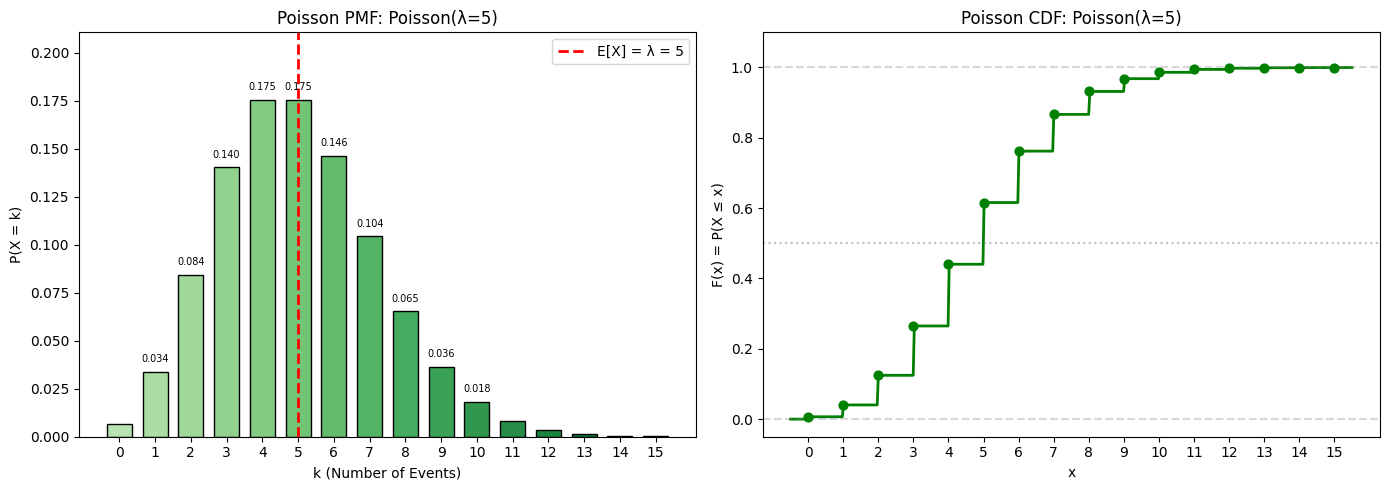

Poisson Distribution: Poisson(λ=5)
  Mean (μ) = λ = 5
  Variance (σ²) = λ = 5
  Standard Deviation (σ) = √λ = 2.2361
  Note: For Poisson, Mean = Variance = λ


In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from math import factorial, exp

# Poisson parameter
lam = 5  # λ (lambda) - average rate of events

# --- PMF Plot ---
# Poisson can take values 0, 1, 2, ... (infinite), but we show up to a reasonable max
k_max = 15
k_values = list(range(0, k_max + 1))
pmf_values = [(lam ** k) * exp(-lam) / factorial(k) for k in k_values]

# --- CDF Plot ---
x_cdf = np.linspace(-0.5, k_max + 0.5, 500)
cdf_values = []
for x in x_cdf:
    if x < 0:
        cdf_values.append(0)
    else:
        cdf_values.append(sum(pmf_values[:min(int(np.floor(x)) + 1, len(pmf_values))]))
cdf_values = np.array(cdf_values)

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PMF plot (bar chart)
colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(k_values)))
bars = axes[0].bar(k_values, pmf_values, color=colors, edgecolor='black', width=0.7)
axes[0].set_xlabel('k (Number of Events)')
axes[0].set_ylabel('P(X = k)')
axes[0].set_title(f'Poisson PMF: Poisson(λ={lam})')
axes[0].set_xticks(k_values)
axes[0].set_ylim(0, max(pmf_values) * 1.2)
# Mark the expected value (which equals λ for Poisson)
axes[0].axvline(x=lam, color='red', linestyle='--', linewidth=2, label=f'E[X] = λ = {lam}')
axes[0].legend()
# Add value labels on top bars
for i, (k, v) in enumerate(zip(k_values, pmf_values)):
    if v > 0.01:
        axes[0].text(k, v + 0.005, f'{v:.3f}', ha='center', fontsize=7)

# CDF plot (step function)
axes[1].plot(x_cdf, cdf_values, color='green', linewidth=2)
# Mark the jump points
cdf_at_k = [sum(pmf_values[:k+1]) for k in range(len(k_values))]
axes[1].scatter(k_values, cdf_at_k, color='green', s=40, zorder=5)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Poisson CDF: Poisson(λ={lam})')
axes[1].set_ylim(-0.05, 1.1)
axes[1].set_xticks(k_values)

plt.tight_layout()
plt.show()

# Print statistics
print(f"Poisson Distribution: Poisson(λ={lam})")
print(f"  Mean (μ) = λ = {lam}")
print(f"  Variance (σ²) = λ = {lam}")
print(f"  Standard Deviation (σ) = √λ = {np.sqrt(lam):.4f}")
print(f"  Note: For Poisson, Mean = Variance = λ")


### Step-by-step Computation 

**Probability Mass Function (PMF):**

Assumption:

The probability of the event occurring follows the Binomial distribution $X \sim \text{Binomial}(n, p)$.

We consider the limit when the number of trials $n \to \infty$, the probability of success each time $p \to 0$, but the average expectation $\lambda = n p$ is kept fixed (constant).

Then $p = \frac{\lambda}{n}$.

We need to prove $\lim_{n \to \infty} P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$.

Step 1: Write the Binomial PMF formula

$$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$$

Substitute $p = \frac{\lambda}{n}$ into the formula:

$$P(X=k) = \frac{n!}{k!(n-k)!} \left(\frac{\lambda}{n}\right)^k \left(1 - \frac{\lambda}{n}\right)^{n-k}$$

Step 2: Expand factorial and power

We know $\frac{n!}{(n-k)!} = n(n-1)(n-2)\dots(n-k+1)$.

Separate the components in the expression:

$$P(X=k) = \frac{1}{k!} \cdot \underbrace{n(n-1)\dots(n-k+1)}_{\text{Factorial numerator}} \cdot \underbrace{\frac{\lambda^k}{n^k}}_{\text{Separate } p^k} \cdot \underbrace{\left(1 - \frac{\lambda}{n}\right)^n \left(1 - \frac{\lambda}{n}\right)^{-k}}_{\text{Separate } (1-p)^{n-k}}$$

Step 3: Group variables dependent on $n$

Rearrange to easily calculate the limit:

$$P(X=k) = \frac{\lambda^k}{k!} \cdot \underbrace{\frac{n(n-1)\dots(n-k+1)}{n^k}}_{\text{Group A}} \cdot \underbrace{\left(1 - \frac{\lambda}{n}\right)^n}_{\text{Group B}} \cdot \underbrace{\left(1 - \frac{\lambda}{n}\right)^{-k}}_{\text{Group C}}$$

Step 4: Calculate the limit of each group as $n \to \infty$

Group A: Divide $n^k$ (consisting of $k$ numbers of $n$) for each term in the numerator:

$$\lim_{n \to \infty} \frac{n}{n} \cdot \frac{n-1}{n} \cdots \frac{n-k+1}{n} = 1 \cdot (1-0) \cdots (1-0) = 1$$

Group B: This is the basic limit definition of the exponential function:

$$\lim_{n \to \infty} \left(1 - \frac{\lambda}{n}\right)^n = e^{-\lambda}$$

Group C: When $n \to \infty$ then $\frac{\lambda}{n} \to 0$:

$$\lim_{n \to \infty} \left(1 - 0\right)^{-k} = 1$$

Step 5: Conclusion

Multiply the results together:

$$P(X=k) = \frac{\lambda^k}{k!} \cdot 1 \cdot e^{-\lambda} \cdot 1$$

$$\Rightarrow P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!} \quad \text{(Required to be proved)}$$

**Cumulative Distribution Function (CDF):**

Need to prove:


$$F(x) = \begin{cases}

0 & \text{if } x < 0 \\

e^{-\lambda} \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k}{k!} & \text{if } x \ge 0

\end{cases}$$

We start from the original definition of the cumulative distribution function:

$$F(x) = P(X \le x)$$

The Poisson random variable $X$ only takes non-negative integer values: $\{0, 1, 2, \dots\}$.

Case 1: $x < 0$

Since $X$ always takes non-negative values ($X \ge 0$), the event $\{X \le x\}$ with $x < 0$ is impossible.

Therefore: $F(x) = 0$.

Case 2: $x \ge 0$

To calculate $P(X \le x)$, we need to sum the probabilities of all integer values $k$ that variable $X$ can take, provided $k$ does not exceed $x$.

The condition "$k$ is an integer and $k \le x$" is equivalent to "$k$ is an integer and $k \le \lfloor x \rfloor$".

Thus we have:

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} P(X=k)$$

Substitute the Poisson probability mass function (PMF) formula: $P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$.

$$F(x) = \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k e^{-\lambda}}{k!}$$

Since $e^{-\lambda}$ is constant with respect to the running index $k$, we can take it out of the sum (distributive property of multiplication):

$$F(x) = e^{-\lambda} \sum_{k=0}^{\lfloor x \rfloor} \frac{\lambda^k}{k!}$$

**Expectation ($\mu_X$):**

According to the definition of expectation we have:

$$\mathbb{E}[X] = \sum_{k=0}^{\infty} k \cdot P(X=k)$$

Substituting the Poisson probability mass function (PMF) formula $P(X=k) = \frac{e^{-\lambda}\lambda^k}{k!}$, we get:

$$\mathbb{E}[X] = \sum_{k=0}^{\infty} k \cdot \frac{\lambda^k e^{-\lambda}}{k!}$$

At $k=0$, the first term equals $0$, so we can ignore it and start the sum from $k=1$:

$$\mathbb{E}[X] = \sum_{k=1}^{\infty} k \cdot \frac{\lambda^k e^{-\lambda}}{k!}$$

Proceed to expand the factorial $k! = k \cdot (k-1)!$, simplify $k$ in the numerator and denominator, and simultaneously move the constant $e^{-\lambda}$ outside the sum:

$$\mathbb{E}[X] = e^{-\lambda} \sum_{k=1}^{\infty} \frac{k \cdot \lambda^k}{k(k-1)!} = e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^k}{(k-1)!}$$

Separate one $\lambda$ out so that $\lambda^{k-1}$ remains inside the sum:

$$\mathbb{E}[X] = \lambda e^{-\lambda} \sum_{k=1}^{\infty} \frac{\lambda^{k-1}}{(k-1)!}$$

Set the auxiliary variable $j = k - 1$. When $k=1$ then $j=0$. When $k \to \infty$ then $j \to \infty$. The sum in the brackets is the Taylor expansion of the function $e^\lambda$:

$$\mathbb{E}[X] = \lambda e^{-\lambda} \underbrace{\sum_{j=0}^{\infty} \frac{\lambda^j}{j!}}_{e^\lambda}$$

Finally, replace the sum with $e^\lambda$ and simplify (since $e^{-\lambda} \cdot e^{\lambda} = 1$):

$$\mathbb{E}[X] = \lambda e^{-\lambda} \cdot e^{\lambda} = \lambda$$

**Variance ($\sigma_X^2$):**

We have the formula for variance:

$$\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2$$

We already know the expectation $\mathbb{E}[X] = \lambda$. So the key is to calculate the 2nd Moment ($\mathbb{E}[X^2]$).

Using the identity $k^2 = k(k-1) + k$, we analyze:

$$\mathbb{E}[X^2] = \mathbb{E}[X(X-1) + X] = \mathbb{E}[X(X-1)] + \mathbb{E}[X]$$

$$\mathbb{E}[X^2] = \mathbb{E}[X(X-1)] + \lambda$$

Now we calculate the expectation of the factorial $\mathbb{E}[X(X-1)]$ according to the definition (LOTUS):

$$\mathbb{E}[X(X-1)] = \sum_{k=0}^{\infty} k(k-1) \cdot \frac{\lambda^k e^{-\lambda}}{k!}$$

At $k=0$ and $k=1$, the product $k(k-1) = 0$ so we ignore it and start the sum from $k=2$. Simplify the factorial $\frac{k(k-1)}{k!} = \frac{1}{(k-2)!}$, we have:

$$\mathbb{E}[X(X-1)] = e^{-\lambda} \sum_{k=2}^{\infty} \frac{\lambda^k}{(k-2)!}$$

Set the auxiliary variable $j = k - 2$. Then $\lambda^k = \lambda^{j+2} = \lambda^2 \cdot \lambda^j$. Bring $\lambda^2$ outside:

$$\mathbb{E}[X(X-1)] = \lambda^2 e^{-\lambda} \underbrace{\sum_{j=0}^{\infty} \frac{\lambda^j}{j!}}_{e^\lambda}$$

The sum in the brackets is the Taylor expansion of the function $e^\lambda$. Substituting in we get:

$$\mathbb{E}[X(X-1)] = \lambda^2 e^{-\lambda} \cdot e^{\lambda} = \lambda^2$$

Implies the 2nd moment is:

$$\mathbb{E}[X^2] = \lambda^2 + \lambda$$

Finally, substitute into the initial variance formula:

$$\text{Var}(X) = (\lambda^2 + \lambda) - \lambda^2 = \lambda$$

Thus with the Poisson distribution, both Expectation and Variance equal $\lambda$.


### Concrete Example

In Cybersecurity and Network Administration, the Poisson distribution is the standard model for **DDoS (Distributed Denial of Service) Detection**.

**Scenario:** You manage a Login Server. Under normal conditions, user traffic follows a Poisson distribution because users access the system independently of each other.

- **Normal Baseline:** The average rate of failed login attempts is **$\lambda = 5$ failures per minute** (mostly due to genuine users forgetting passwords).
    
- **Event:** In the past minute, the system monitoring tool recorded **12 failed logins**.
    

**Question:** What is the probability of observing 12 or more failures purely by chance? If this probability (P-value) is too low (e.g., $< 1\%$), we conclude this is a **Brute-force attack** and automatically block the IP.

#### Step-by-Step Computation

We model the number of failed logins as a random variable $X \sim \text{Poisson}(\lambda=5)$. We need to determine if $k=12$ is an anomaly.

The probability of observing exactly $k$ events is:

$$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Substituting $\lambda = 5$ and $k = 12$ directly into the formula:
$$P(X=12) = \frac{5^{12} \cdot e^{-5}}{12!} \approx \mathbf{0.00343}$$

To calculate the total risk, we look at the probability of the event being at least as extreme as observed ($P(X \ge 12)$).

$$P(X \ge 12) = 1 - P(X \le 11) = 1 - \sum_{k=0}^{11} \frac{5^k e^{-5}}{k!}$$

Summing the probabilities from 0 to 11 gives the cumulative probability $F(11) \approx 0.9945$.

$$\text{P-value} = 1 - 0.9945 = \mathbf{0.0055}$$

**Conclusion:** Since $0.55\% < 1\%$, we reject the hypothesis that this is random. **Action: Block IP.**



### Python Implementation

In [4]:
import torch

# 1. System Configuration
# Average rate of normal failed logins/minute
lambda_normal = 5.0 

# Number of failures observed in the current minute
observed_failures = 12

# 2. Build Poisson Model
# This represents the "Baseline" behavior of the system
poisson_model = torch.distributions.poisson.Poisson(rate=lambda_normal)

# 3. Calculate Anomaly Score (P-value)
# We calculate the probability that X >= observed_failures happens purely by chance
# P(X >= k) = 1 - P(X <= k-1) = 1 - CDF(k-1)

# Calculate CDF at k-1 = 11 manually by summing PMFs
cdf_val = 0.0
for k in range(observed_failures): # k runs from 0 to 11
    # log_prob returns logarithm, we use exp() to get the actual probability
    prob_k = torch.exp(poisson_model.log_prob(torch.tensor(float(k))))
    cdf_val += prob_k

p_value = 1.0 - cdf_val

# 4. Decision Making
# Set confidence threshold alpha = 0.01 (1%)
alpha = 0.01

print(f"Average Rate (Normal):   {lambda_normal} fails/minute")
print(f"Observed Rate (Current): {observed_failures} fails/minute")
print(f"P-value (Random Prob):   {p_value.item():.6f}")

print("-" * 40)

if p_value < alpha:
    print(f">>> WARNING: Brute-force attack detected! (P-value {p_value.item():.2%} < 1%)")
else:
    print(">>> NORMAL: Variance likely due to users forgetting passwords.")

Average Rate (Normal):   5.0 fails/minute
Observed Rate (Current): 12 fails/minute
P-value (Random Prob):   0.005453
----------------------------------------
>>> WARNING: Brute-force attack detected! (P-value 0.55% < 1%)


## 2.6. Gaussian Distribution

### Definition

A random variable $X$ follows a Gaussian distribution with mean $\mu$ and variance $\sigma^2$, denoted $X \sim \mathcal{N}(\mu, \sigma^2)$, having the probability density function (PDF):

$$p_{X}(x)=\frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

$\mu$ (Mean): Determines the center position of the "bell".

$\sigma^2$ (Variance): Determines the width of the distribution.

**Cumulative Distribution Function (CDF)**

The document emphasizes that the Gaussian CDF does not have a closed-form using elementary functions. To calculate, we must use the error function erf:

$$F(x) = \frac{1}{2} \left[ 1 + \text{erf}\left( \frac{x - \mu}{\sigma\sqrt{2}} \right) \right]$$

### Graph


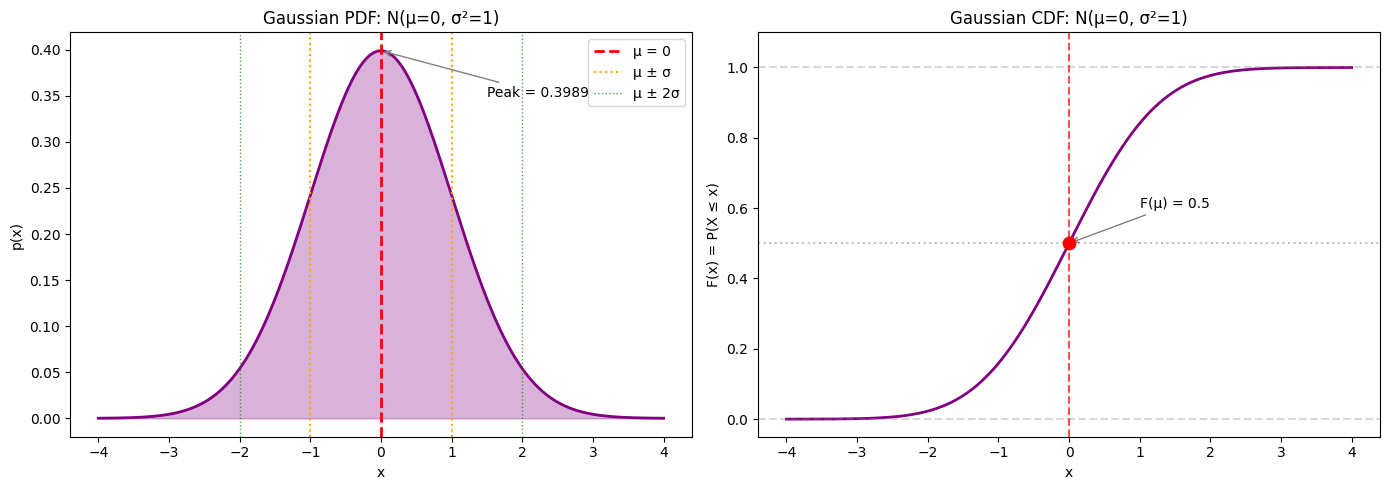

Gaussian (Normal) Distribution: N(μ=0, σ²=1)
  Mean (μ) = 0
  Variance (σ²) = 1
  Standard Deviation (σ) = 1

68-95-99.7 Rule:
  P(μ-σ < X < μ+σ)   ≈ 68.27%
  P(μ-2σ < X < μ+2σ) ≈ 95.45%
  P(μ-3σ < X < μ+3σ) ≈ 99.73%


In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import math

# Gaussian parameters
mu = 0      # Mean
sigma = 1   # Standard deviation (σ)

# --- PDF Plot ---
x_pdf = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
# PDF formula: (1 / sqrt(2*pi*sigma^2)) * exp(-(x-mu)^2 / (2*sigma^2))
pdf_values = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x_pdf - mu)**2 / (2 * sigma**2))

# --- CDF Plot ---
x_cdf = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
# CDF using error function: 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))
from scipy.special import erf
cdf_values = 0.5 * (1 + erf((x_cdf - mu) / (sigma * np.sqrt(2))))

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PDF plot (bell curve)
axes[0].plot(x_pdf, pdf_values, color='purple', linewidth=2)
axes[0].fill_between(x_pdf, pdf_values, alpha=0.3, color='purple')
# Mark mean and standard deviations
axes[0].axvline(x=mu, color='red', linestyle='--', linewidth=2, label=f'μ = {mu}')
axes[0].axvline(x=mu - sigma, color='orange', linestyle=':', linewidth=1.5, label=f'μ ± σ')
axes[0].axvline(x=mu + sigma, color='orange', linestyle=':', linewidth=1.5)
axes[0].axvline(x=mu - 2*sigma, color='green', linestyle=':', linewidth=1, alpha=0.7, label=f'μ ± 2σ')
axes[0].axvline(x=mu + 2*sigma, color='green', linestyle=':', linewidth=1, alpha=0.7)
axes[0].set_xlabel('x')
axes[0].set_ylabel('p(x)')
axes[0].set_title(f'Gaussian PDF: N(μ={mu}, σ²={sigma**2})')
axes[0].legend(loc='upper right')
# Add annotation for peak
peak_height = 1 / np.sqrt(2 * np.pi * sigma**2)
axes[0].annotate(f'Peak = {peak_height:.4f}', xy=(mu, peak_height), 
                 xytext=(mu + 1.5, peak_height - 0.05),
                 arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10)

# CDF plot (S-curve)
axes[1].plot(x_cdf, cdf_values, color='purple', linewidth=2)
axes[1].axhline(y=0, color='gray', linestyle='--', alpha=0.3)
axes[1].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[1].axhline(y=1, color='gray', linestyle='--', alpha=0.3)
axes[1].axvline(x=mu, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
# Mark key probability points
axes[1].scatter([mu], [0.5], color='red', s=80, zorder=5)
axes[1].set_xlabel('x')
axes[1].set_ylabel('F(x) = P(X ≤ x)')
axes[1].set_title(f'Gaussian CDF: N(μ={mu}, σ²={sigma**2})')
axes[1].set_ylim(-0.05, 1.1)
# Add annotations
axes[1].annotate('F(μ) = 0.5', xy=(mu, 0.5), xytext=(mu + 1, 0.6),
                 arrowprops=dict(arrowstyle='->', color='gray'), fontsize=10)

plt.tight_layout()
plt.show()

# Print statistics and probabilities
print(f"Gaussian (Normal) Distribution: N(μ={mu}, σ²={sigma**2})")
print(f"  Mean (μ) = {mu}")
print(f"  Variance (σ²) = {sigma**2}")
print(f"  Standard Deviation (σ) = {sigma}")
print(f"\n68-95-99.7 Rule:")
print(f"  P(μ-σ < X < μ+σ)   ≈ 68.27%")
print(f"  P(μ-2σ < X < μ+2σ) ≈ 95.45%")
print(f"  P(μ-3σ < X < μ+3σ) ≈ 99.73%")


### Step-by-step Computation

We start from the general central limit theorem idea

Let

* $X_1, X_2, \dots, X_N$ be independent and identically distributed random variables,

* each with finite mean $\mathbb{E}[X_i] = \mu$ and variance (\mathrm{Var}(X_i) = \sigma^2 > 0$.

Define the partial sum

$$
X^{(N)} = \sum_{i=1}^{N} X_i.
$$

The mean of the sum is

$$

\mu_{X^{(N)}} = \mathbb{E}[X^{(N)}]

= \mathbb{E}\Big[\sum_{i=1}^{N} X_i\Big]

= \sum_{i=1}^{N} \mathbb{E}[X_i]

= \sum_{i=1}^{N} \mu

= N\mu.

$$

The variance of the sum (using independence) is

$$

\sigma_{X^{(N)}}^{2}

= \mathrm{Var}\Big(\sum_{i=1}^{N} X_i\Big)

= \sum_{i=1}^{N} \mathrm{Var}(X_i)

= \sum_{i=1}^{N} \sigma^2

= N\sigma^2.

$$

  

We then standardize this sum to obtain a new random variable

$$

Y^{(N)} = \frac{X^{(N)} - \mu_{X^{(N)}}}{\sigma_{X^{(N)}}}

= \frac{X^{(N)} - N\mu}{\sqrt{N},\sigma}.

\tag{22.8.15}

$$

  

Step by step properties of $Y^{(N)}$:

  

1. Mean of $Y^{(N)}$:

$$

\mathbb{E}[Y^{(N)}]

= \mathbb{E}\Big[\frac{X^{(N)} - N\mu}{\sqrt{N},\sigma}\Big]

= \frac{1}{\sqrt{N},\sigma}\Big(\mathbb{E}[X^{(N)}] - N\mu\Big)

= \frac{1}{\sqrt{N},\sigma}(N\mu - N\mu)

= 0.

$$

  

2. Variance of $Y^{(N)}$:

For a constant (c) and random variable (Z), (\mathrm{Var}(cZ) = c^2 \mathrm{Var}(Z)). Hence

$$

\mathrm{Var}(Y^{(N)})

= \mathrm{Var}\Big(\frac{X^{(N)} - N\mu}{\sqrt{N},\sigma}\Big)

= \frac{1}{N\sigma^2},\mathrm{Var}(X^{(N)})

= \frac{1}{N\sigma^2} \cdot N\sigma^2

= 1.
$$

  

So $Y^{(N)}$ has mean 0 and variance 1 for every $N$.

  

The central limit theorem states that, as (N) becomes large, the distribution of $Y^{(N)}$ converges to a Gaussian distribution with mean 0 and variance 1. More precisely, for any real numbers $a < b$

$$
\lim_{N \to \infty} \mathbb{P}\big(Y^{(N)} \in [a,b]\big)

\mathbb{P}\big( Z \in [a,b] \big),

\quad Z \sim \mathcal{N}(0,1).

\tag{22.8.16}
$$
  

Equation (22.8.16) says: the standardized sum $Y^{(N)}$ behaves, in the limit, like a standard normal random variable $Z$. This is the core reason why Gaussians appear so often in probability and statistics.

### Concrete Example

In **Robotics and Signal Processing**, the Gaussian distribution is the standard model for **Sensor Noise**.

**Scenario:** A self-driving car uses a LiDAR sensor to measure the distance to an obstacle.

- The **True Distance** is $\mu = 50.0$ meters.
    
- The sensor is not perfect; its readings fluctuate due to thermal noise and vibrations.
    
- The technical manual states the sensor has a standard deviation of $\sigma = 0.5$ meters.
    
- We model the measured distance $X$ as a Gaussian random variable: $X \sim \mathcal{N}(50, 0.5^2)$.
    

**Question:** The car receives a reading of **$x = 50.5$ meters**. What is the probability density (confidence) of this reading?

#### Step-by-Step Computation

We calculate the Probability Density Function (PDF) value at $x = 50.5$ for a Gaussian distribution with $\mu = 50$ and $\sigma = 0.5$.


$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

$$f(50.5) = \frac{1}{\sqrt{2\pi(0.5)^2}} e^{-\frac{(50.5 - 50)^2}{2(0.5)^2}}$$

$$f(50.5) = \frac{1}{\sqrt{0.5\pi}} e^{-0.5} \approx 0.7979 \times 0.6065 \approx \mathbf{0.4839}$$

_(Note: For continuous variables, this value represents **probability density**, not absolute probability)._

### Python Implementation

In [11]:
import torch
import math

# 1. Parameter configuration
mu = 0.0
sigma = 1.0

# 2. Probability Density Function (PDF) - Formula A.17
def gaussian_pdf(x, mu, sigma):
    # Normalization coefficient: 1 / sqrt(2 * pi * sigma^2)
    coefficient = 1.0 / math.sqrt(2 * math.pi * sigma**2)
    # Exponent part: -(x - mu)^2 / (2 * sigma^2)
    exponent = torch.exp(-(x - mu)**2 / (2 * sigma**2))
    return coefficient * exponent

# 3. Cumulative Distribution Function (CDF) - Using erf function
# Book uses integral approximation formula using erf
def gaussian_cdf(x, mu, sigma):
    # Formula: 0.5 * (1 + erf((x - mu) / (sigma * sqrt(2))))
    return 0.5 * (1 + torch.erf((x - mu) / (sigma * math.sqrt(2))))

# --- Illustration ---
x_val = torch.tensor(0.0) # At the bell peak

pdf_val = gaussian_pdf(x_val, mu, sigma)
cdf_val = gaussian_cdf(x_val, mu, sigma)

print(f"Gaussian N({mu}, {sigma}^2) at x = {x_val}")
print(f"PDF (Theory ~ 0.3989): {pdf_val:.4f}")
print(f"CDF (Theory = 0.5):    {cdf_val:.4f}")

# Random sampling as guided by the book
samples = torch.normal(mean=mu, std=sigma, size=(2, 5))
print("\nRandom samples:")
print(samples)

Gaussian N(0.0, 1.0^2) at x = 0.0
PDF (Theory ~ 0.3989): 0.3989
CDF (Theory = 0.5):    0.5000

Random samples:
tensor([[-0.1991, -1.4247,  0.2938, -0.0252,  0.4002],
        [ 0.0813,  0.9513, -0.5119,  0.6249, -0.9159]])


## 2.6. Exponential Family Distribution

### Definition

A probability distribution belongs to the Exponential Family if its probability density function (PDF) or probability mass function (PMF) can be represented in the following canonical form:

$$p(x|\boldsymbol{\eta}) = h(x) \cdot \exp\left( \boldsymbol{\eta}^\top \cdot T(x) - A(\boldsymbol{\eta}) \right)$$

Where the components are defined in detail as follows:

$\boldsymbol{\eta}$ (Natural Parameters): Also called canonical parameters. This is a vector $\boldsymbol{\eta} = (\eta_1, ..., \eta_l) \in \mathbb{R}^l$ that determines the shape of the distribution.

$T(x)$ (Sufficient Statistics): This is a function of the data $T(x) = (T_1(x), ..., T_l(x))$. It is called "sufficient" because the information contained in $T(x)$ is sufficient to calculate the probability density without retaining the entire original data $x$.

$h(x)$ (Underlying Measure): It represents the underlying structure of the data before being affected by the exponential parameters.

$A(\boldsymbol{\eta})$ (Cumulant Function): Cumulative function (or Log-partition function). Its role is to ensure the integral (or sum) of the probability density function equals 1 (distribution normalization). Its formula is:

$$A(\boldsymbol{\eta}) = \log \left[ \int h(x) \cdot \exp(\boldsymbol{\eta}^\top \cdot T(x)) \, dx \right]$$

### Step-by-step Computation 

Gaussian Analysis

To demonstrate the power of this theory, we will transform the Univariate Gaussian distribution into the canonical form of the exponential family, adhering closely to the transformation steps in the document.

Step 1: Starting from the standard Gaussian PDF

$$p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}} \cdot \exp\left\{ -\frac{(x-\mu)^2}{2\sigma^2} \right\}$$

Step 2: Expanding the identity in the exponent

We expand $-(x-\mu)^2 = -(x^2 - 2\mu x + \mu^2) = -x^2 + 2\mu x - \mu^2$.

Substitute into the exponential expression and separate the elements:

$$p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}} \cdot \frac{1}{\sigma} \cdot \exp\left\{ \frac{2\mu x - x^2 - \mu^2}{2\sigma^2} \right\}$$

Logarithmic transformation to bring $\frac{1}{\sigma}$ into the exponential function (note $\frac{1}{\sigma} = \exp(-\log \sigma)$):

$$p(x|\mu, \sigma) = \frac{1}{\sqrt{2\pi}} \cdot \exp\left\{ \frac{\mu}{\sigma^2}x - \frac{1}{2\sigma^2}x^2 - \left( \frac{\mu^2}{2\sigma^2} + \log(\sigma) \right) \right\} \tag{22.8.22}$$

Step 3: Mapping to the canonical form

Based on the equation above, we identify each corresponding component:

Underlying measure $h(x)$:

$$h(x) = \frac{1}{\sqrt{2\pi}}$$

Natural parameters $\boldsymbol{\eta}$: Is a 2-dimensional vector:

$$\boldsymbol{\eta} = \begin{bmatrix} \eta_1 \\ \eta_2 \end{bmatrix} = \begin{bmatrix} \frac{\mu}{\sigma^2} \\ \frac{1}{2\sigma^2} \end{bmatrix}$$

Sufficient statistics $T(x)$: (Note how the document handles the negative sign)

$$T(x) = \begin{bmatrix} x \\ -x^2 \end{bmatrix}$$

(Check: $\boldsymbol{\eta}^\top T(x) = \frac{\mu}{\sigma^2}x + \frac{1}{2\sigma^2}(-x^2)$, matching the expansion in Step 2).

Cumulant function $A(\boldsymbol{\eta})$:

$$A(\boldsymbol{\eta}) = \frac{\mu^2}{2\sigma^2} + \log(\sigma) = \frac{\eta_1^2}{4\eta_2} - \frac{1}{2}\log(2\eta_2)$$


## Significance in Computer Science

Reducing to the Exponential Family allows us to build generalized machine learning models (Generalized Linear Models - GLM). Instead of having to write separate optimization algorithms for each type of distribution, we can build a general theoretical framework to train for binary data (Bernoulli), count data (Poisson), and real data (Gaussian).



# Exercise

## Exercise 1

> "What is the standard deviation of a random variable that is the difference $X - Y$ of two independent binomial random variables $X, Y \sim \text{Binomial}(16, 1/2)$."

### Step-by-step computation

According to the problem, we have both $X$ and $Y$ following the Binomial distribution with:

- Number of trials: $n = 16$
    
- Probability of success: $p = 1/2 = 0.5$
    
According to the variance formula of random variable $X \sim \text{Binomial}(n, p)$, it is:
    

$$\text{Var}(X) = np(1-p) = 16 \cdot 0.5 \cdot (1 - 0.5) = 16 \cdot 0.5 \cdot 0.5$$

Since $X$ and $Y$ have the same distribution (iid: Independent and Identically Distributed), then:

$$\text{Var}(Y) = \text{Var}(X) =4$$

Let $Z = X - Y$

Since $X$ and $Y$ are two independent random variables, the variance of the difference equals the sum of the variances:

$$\begin{aligned}     \text{Var}(Z) &= \text{Var}(X - Y) \\     &= \text{Var}(X + (-1)Y) \\     &= \text{Var}(X) + (-1)^2 \text{Var}(Y) \\     &= \text{Var}(X) + \text{Var}(Y) \\     &= 4 + 4 \\     &= 8 \end{aligned}$$

The standard deviation is the square root of the variance:

$$\sigma_Z = \sqrt{\text{Var}(Z)} = \sqrt{8} \approx 2.8284$$

**Comment:**

In probability and statistics, Volatility (Variance) measures "uncertainty" or "error". Combining independent random variables (whether adding or subtracting) always increases the uncertainty of the system.

**Explain why $\text{Var}(-Y) = (-1)^2 \text{Var}(Y)$:**

The definition of variance of random variable $Y$ states:

$$\text{Var}(Y) = \mathbb{E}[(Y - \mu_Y)^2]$$

Consider a random variable $Z = aY$, we have the expectation of $Z$: $\mu_Z = a\mu_Y$.

Substitute into the variance formula:

$$\begin{aligned} \text{Var}(aY) &= \mathbb{E}[(aY - a\mu_Y)^2] \\ &= \mathbb{E}[(a(Y - \mu_Y))^2] \quad \\ &= \mathbb{E}[a^2 (Y - \mu_Y)^2] \quad  \\ &= a^2 \cdot \mathbb{E}[(Y - \mu_Y)^2] \quad \\ &= a^2 \cdot \text{Var}(Y) \end{aligned}$$

With $a = -1$:

$$\text{Var}(-Y) = (-1)^2 \text{Var}(Y) = 1 \cdot \text{Var}(Y) = \text{Var}(Y)$$


### Python Implementation

We use the **Monte Carlo Simulation** method to verify the theoretical result. By generating 100,000 pairs of samples, we can calculate the empirical standard deviation and compare it with the figure $\sqrt{8}$.


In [ ]:
import torch

# 1. Problem configuration
n = 16
p = 0.5
num_samples = 100000  # Large number of test samples to ensure accuracy

# 2. Create Binomial distribution
dist = torch.distributions.binomial.Binomial(total_count=n, probs=p)

# 3. Random sampling for X and Y
# Generate 100,000 independent values for X and Y
X_samples = dist.sample((num_samples,))
Y_samples = dist.sample((num_samples,))

# 4. Calculate difference variable Z = X - Y
Z_samples = X_samples - Y_samples

# 5. Calculate Empirical Standard Deviation
empirical_std = torch.std(Z_samples)

# 6. Compare with theoretical result
theory_std = torch.sqrt(torch.tensor(8.0))

print(f"Theory (sqrt(8)):            {theory_std.item():.5f}")
print(f"Empirical (Simulation):       {empirical_std.item():.5f}")

# Check absolute error
error = abs(empirical_std - theory_std)
print(f"Absolute Error: {error.item():.5f}")

The absolute error will be very small ($< 0.01$), proving the theoretical calculation is correct.

## Exercise 2

> "If we take a Poisson random variable $X \sim \text{Poisson}(\lambda)$ and consider $(X-\lambda)/\sqrt{\lambda}$ as $\lambda \to \infty$, we can show that this becomes approximately Gaussian. Why does this make sense?"

### Step-by-step computation

According to the additive property of Poisson, the sum of independent Poisson variables is also a Poisson variable. That is, if $Y_1 \sim \text{Poisson}(\lambda_1)$ and $Y_2 \sim \text{Poisson}(\lambda_2)$, then $Y_1 + Y_2 \sim \text{Poisson}(\lambda_1 + \lambda_2)$.

Suppose $\lambda$ is a large positive integer $n$ ($\lambda = n$). We can consider the variable $X \sim \text{Poisson}(n)$ as the sum of $n$ smaller independent random variables, each with parameter 1:

$$X = Y_1 + Y_2 + \dots + Y_n$$

Where each $Y_i \sim \text{Poisson}(1)$. For each component variable $Y_i \sim \text{Poisson}(1)$:

- Expectation: $\mu_{Y_i} = 1$
    
- Variance: $\sigma^2_{Y_i} = 1$
    

According to the Central Limit Theorem (CLT), the Sum (or mean) of a large number of independent random variables (i.i.d) will have an approximately Gaussian distribution when standardized.

Consider the standardized variable $Z$:

$$Z = \frac{\text{Sum} - \text{Expectation of Sum}}{\text{Standard Deviation of Sum}}$$

$$Z = \frac{X - n \cdot \mu_{Y_i}}{\sqrt{n \cdot \sigma^2_{Y_i}}} = \frac{X - n \cdot 1}{\sqrt{n \cdot 1}} = \frac{X - n}{\sqrt{n}}$$

Substituting $n$ back with $\lambda$, we have:

$$Z = \frac{X - \lambda}{\sqrt{\lambda}}$$

When $\lambda \to \infty$ (i.e., $n \to \infty$), according to CLT, variable $Z$ will converge to the Standard Normal Distribution $\mathcal{N}(0, 1)$.

This makes sense because the nature of Poisson with large $\lambda$ is exactly the sum of many small independent random variables, satisfying the core condition of the Central Limit Theorem.



### Python implementation

To illustrate this in the report, we will perform an experiment:

1. Generate data from Poisson distribution with very large $\lambda$ (e.g.: 1000).
    
2. Standardize that data (subtract $\lambda$, divide by $\sqrt{\lambda}$).
    
3. Draw Histogram chart and compare it with the bell curve of standard Gaussian $\mathcal{N}(0, 1)$.

In [ ]:

import torch
import matplotlib.pyplot as plt
import math

# 1. Configuration
lam = 1000.0  # Large Lambda to clearly see convergence
n_samples = 100000

# 2. Generate Poisson data
# X ~ Poisson(lambda)
poisson_dist = torch.distributions.poisson.Poisson(lam)
X = poisson_dist.sample((n_samples,))

# 3. Data standardization (Standardization)
# Z = (X - lambda) / sqrt(lambda)
Z = (X - lam) / torch.sqrt(torch.tensor(lam))

# 4. Plot comparison chart
plt.figure(figsize=(10, 6))

# Plot Histogram of standardized Poisson data
# density=True so y-axis is probability density (comparable to PDF)
plt.hist(Z.numpy(), bins=100, density=True, alpha=0.6, color='skyblue', label='Standardized Poisson')

# Plot standard Gaussian curve N(0, 1) for comparison
x = torch.arange(-4, 4, 0.01)
# Standard Gaussian PDF formula: 1/sqrt(2pi) * e^(-x^2/2)
gaussian_pdf = (1 / math.sqrt(2 * math.pi)) * torch.exp(-0.5 * x**2)

plt.plot(x.numpy(), gaussian_pdf.numpy(), 'r-', linewidth=2, label='Standard Normal N(0, 1)')

plt.title(f"Poisson convergence to Gaussian (lambda={lam})")
plt.xlabel("Standardized Value (Z-score)")
plt.ylabel("Probability Density (Density)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Although Poisson is a discrete distribution (bars), when $\lambda$ is large, these bars become very thin and close together, creating a smooth shape that perfectly matches the continuous Gaussian curve.

## Exercise 3

> "What is the probability mass function for a sum of two discrete uniform random variables on $n$ elements?"

Suppose we have two independent random variables $X$ and $Y$ both following a discrete uniform distribution on the set $\{1, 2, \dots, n\}$.

  - $P(X=i) = \frac{1}{n}$ with $i \in \{1, \dots, n\}$.
        
  - $P(Y=j) = \frac{1}{n}$ with $j \in \{1, \dots, n\}$.
        

Let $Z = X + Y$ be the sum of these two variables. We need to find the probability mass function $P(Z=k)$.

Since $X$ and $Y$ are independent, the sample space of the pair $(X, Y)$ is the Cartesian product of the two value sets. We have:
The total number of equally likely cases is: $|\Omega| = n \times n = n^2$ (Sample space) and the probability of occurrence of each specific pair $(x, y)$ is $\frac{1}{n^2}$.
    
We also see:

  - Minimum value of $Z$: $1 + 1 = 2$.
  - Maximum value of $Z$: $n + n = 2n$.

To find PMF $P(Z=k)$, we need to count the number of pairs $(x, y)$ such that $x + y = k$ ( $k \in \{2, 3, \dots, 2n\}$)

To calculate probability $P(Z=k)$, we use Laplace's classical formula:

$$P(Z=k) = \frac{\text{Number of favorable cases (Sum equals k)}}{\text{Total number of cases (Sample space)}}$$

**Counting favorable cases:** 

To calculate $P(Z=k)$, we need to count the number of integer solution pairs $(x, y)$ satisfying the system of conditions:

$$\begin{cases} 1 \le x \le n \\ 1 \le y \le n \\ x + y = k \end{cases}$$

Substitute $y = k - x$ into the condition of $y$, we have $1 \le k - x \le n$, implying:

$$k - n \le x \le k - 1$$

Combining with condition $1 \le x \le n$, the number of valid values of $x$ is the number of integers in the interval:

$$[\max(1, k-n), \min(n, k-1)]$$

The number of ways to choose (numerator) is calculated by the formula: $\text{Upper bound} - \text{Lower bound} + 1$. We divide into 2 cases based on the magnitude of $k$:

  - **Case 1: Slope up ($2 \le k \le n+1$)**
        
    - Upper bound is $k-1$ (since $k-1 \le n$).

    - Lower bound is $1$ (since $k-n \le 1$).

    - Number of ways = $(k - 1) - 1 + 1 = k - 1$.
            
  - **Case 2: Slope down ($n+1 < k \le 2n$)**
        
    - Upper bound is $n$ (since $k-1 > n$).
           
    - Lower bound is $k-n$ (since $k-n > 1$).
    
    - Number of ways = $n - (k - n) + 1 = 2n - k + 1$.
            

Dividing the number of ways by the sample space $n^2$, we have the probability formula:

$$P(Z=k) = \begin{cases} \frac{k-1}{n^2} & 2 \le k \le n+1 \\ \frac{2n - k + 1}{n^2} & n+1 \lt k \le 2n \end{cases}$$

Can be combined using a neater absolute value formula:

$$P(Z=k) = \frac{n - |k - (n+1)|}{n^2}$$

#### 3\. Python Implementation (Verification Setup)

Using Monte Carlo simulation to roll two $n$-sided "dice" and verify if the histogram of the sum matches the theoretical triangle or not.

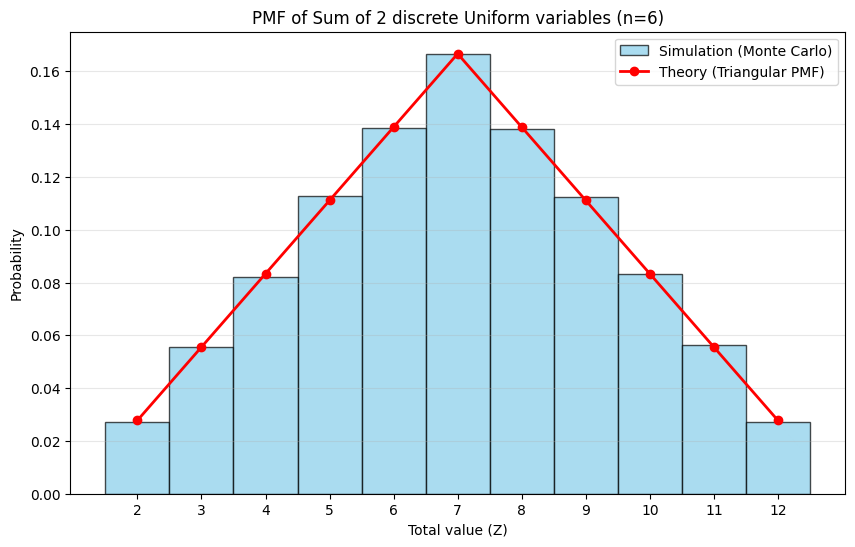

In [22]:
import torch
import matplotlib.pyplot as plt

# 1. Problem configuration
n = 6# Example: 6-sided die
num_samples = 100000

# 2. Generate random data (Simulation)
# X, Y ~ U(1, n)
X = torch.randint(low=1, high=n + 1, size=(num_samples,))
Y = torch.randint(low=1, high=n + 1, size=(num_samples,))

# 3. Calculate sum variable Z
Z = X + Y

# 4. Calculate Theoretical PMF (Theoretical Formula)
# Z runs from 2 to 2n
z_values = torch.arange(2, 2 * n + 1)
theoretical_probs = []

for k in z_values.tolist():
    # Formula: (n - |k - (n+1)|) / n^2
    prob = (n - abs(k - (n + 1))) / (n**2)
    theoretical_probs.append(prob)

# 5. Plot comparison chart
plt.figure(figsize=(10, 6))

# Empirical Histogram (bar type)
# bins are set to align correctly with integers
plt.hist(Z.numpy(), bins=torch.arange(1.5, 2 * n + 1.5).numpy(), density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Simulation (Monte Carlo)')

# Theoretical line (triangle shape)
plt.plot(z_values.numpy(), theoretical_probs, 'r-o', linewidth=2, label='Theory (Triangular PMF)')

plt.title(f"PMF of Sum of 2 discrete Uniform variables (n={n})")
plt.xlabel("Total value (Z)")
plt.ylabel("Probability")
plt.xticks(z_values.numpy())
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

The chart will display blue bars matching perfectly with the red triangular polyline, highest peak at $k=7$ (with probability $6/36 \approx 0.167$) and lowest at $k=2, 12$.

# References

[1] A. Zhang, Z. C. Lipton, M. Li, and A. J. Smola, “Distributions,” in 
    *Dive into Deep Learning*. [Online]. Available: 
    https://d2l.ai/chapter_appendix-mathematics-for-deep-learning/distributions.html

[2] “Bernoulli distribution,” *Wikipedia, The Free Encyclopedia*. [Online]. Available:
    https://en.wikipedia.org/wiki/Bernoulli_distribution

[3] “Discrete uniform distribution,” *Wikipedia, The Free Encyclopedia*. [Online]. Available:
    https://en.wikipedia.org/wiki/Discrete_uniform_distribution

[4] “Continuous uniform distribution,” *Wikipedia, The Free Encyclopedia*. [Online]. Available:
    https://en.wikipedia.org/wiki/Continuous_uniform_distribution

[5] “Binomial distribution,” *Wikipedia, The Free Encyclopedia*. [Online]. Available:
    https://en.wikipedia.org/wiki/Binomial_distribution

[6] “Poisson distribution,” *Wikipedia, The Free Encyclopedia*. [Online]. Available:
    https://en.wikipedia.org/wiki/Poisson_distribution

[7] “Normal distribution,” *Wikipedia, The Free Encyclopedia*. [Online]. Available:
    https://en.wikipedia.org/wiki/Normal_distribution

[8] “Exponential family,” *Wikipedia, The Free Encyclopedia*. [Online]. Available:
    https://en.wikipedia.org/wiki/Exponential_family

[9] Đ. H. Cường and P. D. Khánh, *Xác Suất Thống Kê*. 
    Nhà Xuất Bản Đại Học Sư Phạm TP. Hồ Chí Minh, Vietnam.

[10] N. T. T. Thủy, *Bài Giảng Xác Suất Thống Kê*. 
     Trường Đại Học Bách Khoa Hà Nội, Viện Toán Ứng Dụng và Tin Học, 
     Hà Nội, Vietnam, 2020.